<div style="text-align: center;">
  <img src="./imagens/logo_novaims.png" alt="Logo" style="width: 150px; height: auto; margin-bottom: 10px;">
  <h1 style="margin: 0;"><strong>Machine Learning Project: Amazing International Airlines Inc.</strong></h1>
  <h2 style="margin: 0;"><strong>Part 1/2: Exploratory Data Analysis</strong></h2>
</div>

<div style="text-align: left; margin-top: 15px;">
  <p style="margin: 0;"><strong>Group 51:</strong></p>
  <ul style="margin: 0; padding-left: 20px;">
    <li>André Ferreira | 20250398</li>
    <li>Fausto Gomes | 20221915</li>
    <li>Maria Francisca Gonçalves | 20221942</li>
    <li>Miguel Matos | 20221925</li>
  </ul>
</div>

# <span style="color:#0097b2">0. Context</span>

## 1. Business Understanding

Amazing International Airlines Inc. (AIAI) is a commercial airline that operates in an increasingly competitive market, where customer loyalty and personalized experiences are key differentiators. Despite having a well-established loyalty program, AIAI faces challenges in understanding the diversity of its customer base and designing targeted marketing strategies.

The main business goal of this project is to **develop data-driven customer segmentation** that supports personalized marketing initiatives, improves customer retention, and increases overall profitability. By identifying distinct customer groups, AIAI aims to tailor services, loyalty benefits, and communication strategies to the specific needs and behaviors of each segment.

As data mining consultants for AIAI, we will analyze three years of loyalty and flight activity data to extract insights about customer behavior and value patterns.

The analysis will follow the **CRISP-DM methodology**, beginning with business and data understanding (current phase), followed by data preparation, modeling, evaluation, and deployment.  
In this EDA stage, the focus is on:
- Exploring and assessing the quality of the datasets provided by AIAI.
- Identifying relevant variables and potential data issues.
- Engineering new features that capture customer value and travel behavior.
- Formulating hypotheses for the subsequent clustering phase.

Ultimately, the insights generated in this phase will form the foundation for creating meaningful and actionable customer segments that align with AIAI’s strategic objectives.




# <span style="color:#0097b2">1. Importing Packages and Libraries</span>

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# <span style="color:#0097b2">2. Reading the Data</span>

In [2]:
# Load data
customer_df = pd.read_csv('../data/raw/DM_AIAI_CustomerDB.csv')
flights_df = pd.read_csv('../data/raw/DM_AIAI_FlightsDB.csv')

# Basic info
print("CustomerDB shape:", customer_df.shape)
print("FlightsDB shape:", flights_df.shape)

CustomerDB shape: (16921, 21)
FlightsDB shape: (608436, 10)


- The **Customer Database** (`CustomerDB`) contains **16,921 records** and **21 columns**, each representing a unique customer enrolled in the loyalty program.  

- The **Flights Database** (`FlightsDB`) contains **608,436 records** and **10 columns**, each representing a customer’s monthly flight activity.  

# <span style="color:#0097b2">3. Metadata</span>

**Customer Database (`DM_AIAI_CustomerDB.csv`)**
- `Unnamed: 0`: Imported row index (redundant; to be dropped)
- `Loyalty#`: Unique customer identifier
- `First Name`: Customer first name
- `Last Name`: Customer last name
- `Customer Name`: Full name
- `Country`: Country of residence
- `Province or State`: State/Province
- `City`: City
- `Latitude`: Latitude of residence
- `Longitude`: Longitude of residence
- `Postal code`: Postal/ZIP code
- `Gender`: Customer gender
- `Education`: Education level
- `Location Code`: Urban/Suburban/Rural classification
- `Income`: Annual income (USD)
- `Marital Status`: Marital status
- `LoyaltyStatus`: Loyalty program tier (Aurora, Nova, Star)
- `EnrollmentDateOpening`: Program enrollment date
- `CancellationDate`: Program cancellation date (if any)
- `Customer Lifetime Value`: Estimated lifetime value (USD)
- `EnrollmentType`: Enrollment channel/type (e.g., Standard, 2021 Promotion)

**Flights Database (`DM_AIAI_FlightsDB.csv`)**
- `Loyalty#`: Customer identifier (foreign key)
- `Year`: Activity year
- `Month`: Activity month (1–12)
- `YearMonthDate`: First day of the activity month
- `NumFlights`: Number of flights in the month
- `NumFlightsWithCompanions`: Flights with companions
- `DistanceKM`: Total distance flown (km)
- `PointsAccumulated`: Loyalty points earned
- `PointsRedeemed`: Loyalty points redeemed
- `DollarCostPointsRedeemed`: Dollar value of redeemed points


**Relationship Between Datasets**

The **Customer Database (CustomerDB)** and the **Flights Database (FlightsDB)** are related through the common key **`Loyalty#`**, which uniquely identifies each customer.

- In **CustomerDB**, each row represents a **unique customer**, including demographic details, loyalty status, and lifetime value information.  
- In **FlightsDB**, each row corresponds to a **monthly flight activity record** for a given customer, containing information about flights, distance, and loyalty points earned or redeemed.

This establishes a **one-to-many (1 → N) relationship**, where:  
> **One customer** can have **multiple flight activity records** across different months.

This relationship allows the integration of both datasets into a single, richer analytical table through a merge operation on the `Loyalty#` key.  
Such integration will enable a comprehensive customer view that combines **demographic, behavioral, and value-based attributes**, essential for the upcoming clustering analysis.

In [3]:
flights_df

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.00,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.00,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.00,0.0,0.0
3,185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.00,3213.0,32.0
4,216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
608431,999902,2019,12,12/1/2019,7.2,0.0,30766.5,3076.65,0.0,0.0
608432,999911,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608433,999940,2019,12,12/1/2019,14.4,0.9,18261.0,1826.10,0.0,0.0
608434,999982,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0


### Columns Overview and Dataset Preview

Before proceeding with deeper exploration, it is useful to examine the list of columns in dataset and visually inspect some sample records.


This helps confirm that the data has been imported correctly, that column names are consistent with the metadata, and that the content follows the expected structure.

In [4]:
# Display all columns for dataset
print("\nFlightsDB columns:\n", flights_df.columns.tolist())


FlightsDB columns:
 ['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights', 'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']


In [5]:
# Preview dataset in different positions for CustomerDB
print("\nFirst 5 rows (CustomerDB):")
display(customer_df.head())

print("Last 5 rows (CustomerDB):")
display(customer_df.tail())

# Preview dataset in different positions for FlightsDB
print("\nFirst 5 rows (FlightsDB):")
display(flights_df.head())

print("Last 5 rows (FlightsDB):")
display(flights_df.tail())


First 5 rows (CustomerDB):


,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


Last 5 rows (CustomerDB):


,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16916,15,100012,Ethan,Thompson,Ethan Thompson,Canada,Quebec,Quebec City,46.759733,-71.141009,...,male,Bachelor,Suburban,NaN,Single,Star,2/27/2019,2/27/2019,NaN,Standard
16917,16,100013,Layla,Young,Layla Young,Canada,Alberta,Edmonton,53.524829,-113.546357,...,female,Bachelor,Rural,NaN,Married,Star,9/20/2017,9/20/2017,NaN,Standard
16918,17,100014,Amelia,Bennett,Amelia Bennett,Canada,New Brunswick,Moncton,46.051866,-64.825428,...,male,Bachelor,Rural,NaN,Married,Star,11/28/2020,11/28/2020,NaN,Standard
16919,18,100015,Benjamin,Wilson,Benjamin Wilson,Canada,Quebec,Quebec City,46.862970,-71.133444,...,female,College,Urban,NaN,Married,Star,4/9/2020,4/9/2020,NaN,Standard
16920,19,100016,Emma,Martin,Emma Martin,Canada,British Columbia,Dawson Creek,55.720562,-120.160090,...,female,Master,Suburban,NaN,Single,Star,7/21/2020,7/21/2020,NaN,Standard



First 5 rows (FlightsDB):


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0
3,185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.0,3213.0,32.0
4,216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.0,0.0,0.0


Last 5 rows (FlightsDB):


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
608431,999902,2019,12,12/1/2019,7.2,0.0,30766.5,3076.65,0.0,0.0
608432,999911,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608433,999940,2019,12,12/1/2019,14.4,0.9,18261.0,1826.10,0.0,0.0
608434,999982,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608435,999986,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0


# <span style="color:#0097b2">4. Data Exploration - Initial Analysis</span>

### 4.1 Columns Overview and Dataset Preview

In this section, we inspect the overall structure of th dataset using the `info()` method.  
This provides an overview of:
- The number of records and columns  
- The data types of each variable (`int`, `float`, `object`, etc.)  
- The presence of missing values (non-null count differences)

This analysis helps to identify which variables may need data type conversions and highlights potential columns requiring cleaning or imputation.

In [6]:
print("\nFlightsDB Info:")
flights_df.info()


FlightsDB Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


#### Observations – Flights Database

- The **FlightsDB** dataset contains **608,436 records** and **10 columns**, representing monthly flight activity for each customer.  
- The common identifier `Loyalty#` is present, enabling a future merge with the CustomerDB.  
- All variables have **no missing values**, indicating a clean dataset.  
- The column `YearMonthDate` is stored as `object` but should be converted to a `datetime` type for easier temporal analysis.  
- The dataset is mostly numeric, making it suitable for aggregation and feature engineering (e.g., total distance, total points).  
- Given its size, this dataset likely includes multiple records per customer.


### 4.2 Dataset Statistics
We use the `describe()` method to compute basic descriptive statistics for all numerical variables, including the mean, standard deviation, minimum, maximum, and quartiles.


This provides a general understanding of the data distribution and allows the identification of potential outliers or inconsistent values.

In [7]:
print("\nFlightsDB - Full Summary:")
display(flights_df.describe(include="all").T)


FlightsDB - Full Summary:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty#,608436.0,NaN,NaN,NaN,550037.873084,258935.180575,100018.0,326961.0,550834.0,772194.0,999986.0
Year,608436.0,NaN,NaN,NaN,2020.0,0.816497,2019.0,2019.0,2020.0,2021.0,2021.0
Month,608436.0,NaN,NaN,NaN,6.5,3.452055,1.0,3.75,6.5,9.25,12.0
YearMonthDate,608436,36,12/1/2021,16901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumFlights,608436.0,NaN,NaN,NaN,3.908107,5.057889,0.0,0.0,0.0,7.2,21.0
NumFlightsWithCompanions,608436.0,NaN,NaN,NaN,0.983944,2.003785,0.0,0.0,0.0,0.9,11.0
DistanceKM,608436.0,NaN,NaN,NaN,7939.341419,10260.421873,0.0,0.0,856.4,15338.175,42040.0
PointsAccumulated,608436.0,NaN,NaN,NaN,793.777781,1025.918521,0.0,0.0,85.275,1533.7125,4204.0
PointsRedeemed,608436.0,NaN,NaN,NaN,235.251678,983.233374,0.0,0.0,0.0,0.0,7496.0
DollarCostPointsRedeemed,608436.0,NaN,NaN,NaN,2.324835,9.725168,0.0,0.0,0.0,0.0,74.0



##### Flights Database (`FlightsDB`)
- The dataset records **608,436 monthly flight activities** over **3 years (2019–2021)**, with each record tied to a specific customer (`Loyalty#`).  
- **Flights per month:** average ≈ 3.9, but median = 0 - indicating that many customers have months without flights.  
- **Flights with companions:** low mean (~1), suggesting most customers travel alone.  
- **DistanceKM:** highly variable, average ≈ **7,939 km**, ranging up to 42,000 km — reflecting a mix of short and long-haul travelers.  
- **PointsAccumulated vs PointsRedeemed:** average earned points ≈ 794, redeemed ≈ 235 → most customers accumulate more than they use.  
- **DollarCostPointsRedeemed:** average ≈ 2.3 USD, confirming that most redemption values are small or zero.  

These statistics highlight that flight behavior is **uneven across customers** — with a majority of low-activity members and a smaller segment of frequent travelers. This variability will be crucial for identifying behavioral clusters in the next phase.

### 4.3 Check for duplicates

To ensure data integrity, two complementary checks were performed to identify potential duplicate records in the `FlightsDB`:

1. **Exact Duplicates:**  
   Rows that are fully identical across all columns. These typically arise from accidental data replication or export issues.  

2. **Logical Duplicates:**  
   Multiple entries for the same customer (`Loyalty#`) in the same month and year (`Year`, `Month`).  
   Since each customer should have only one record per month, these cases may indicate repeated or inconsistent data entries.


In [8]:
# --- Exact duplicates ---
exact_duplicates = flights_df.duplicated().sum()
print(f"Number of exact duplicate rows: {exact_duplicates}")

# --- Logical duplicates (by customer-month) ---
key_counts = flights_df.groupby(['Loyalty#','Year','Month']).size().reset_index(name='n')
dups_key = key_counts[key_counts['n'] > 1].sort_values('n', ascending=False)
print(f"Customer-month keys with duplicates: {len(dups_key)}")
display(dups_key.head(10))


##using mask to show all duplicate rows
dup_mask = flights_df.duplicated(subset=['Loyalty#', 'Year', 'Month'], keep=False)
print("Duplicate rows:", dup_mask.sum())
flights_df[dup_mask].sort_values(['Loyalty#', 'Year', 'Month']).head(10)


Number of exact duplicate rows: 2903
Customer-month keys with duplicates: 5868


,Loyalty#,Year,Month,n
387643,678205,2021,8,3
387633,678205,2020,10,3
387623,678205,2019,12,3
387624,678205,2020,1,3
387625,678205,2020,2,3
387626,678205,2020,3,3
387627,678205,2020,4,3
387628,678205,2020,5,3
387629,678205,2020,6,3
387630,678205,2020,7,3


Duplicate rows: 11772


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
405665,101902,2019,1,1/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
405666,101902,2019,1,1/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
422566,101902,2019,2,2/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
422567,101902,2019,2,2/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
439467,101902,2019,3,3/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
439468,101902,2019,3,3/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
456368,101902,2019,4,4/1/2019,3.6,0.0,10082.7,1008.27,0.0,0.0
456369,101902,2019,4,4/1/2019,3.6,3.6,15718.5,1571.85,3536.1,35.1
473269,101902,2019,5,5/1/2019,8.1,2.7,16708.5,1670.85,0.0,0.0
473270,101902,2019,5,5/1/2019,6.3,0.0,23946.3,2394.63,0.0,0.0


- Are they really duplicates? 
- Or several trips in the same month that the system recorded separately? 

In [9]:
# Check all records for this specific customer and month
flights_df[(flights_df['Loyalty#'] == 678205) & 
            (flights_df['Year'] == 2020) & 
            (flights_df['Month'] == 1)]


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
75663,678205,2020,1,1/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
80590,678205,2020,1,1/1/2020,0.0,0.0,0.0,0.0,0.0,0.0
82412,678205,2020,1,1/1/2020,0.0,0.0,0.0,0.0,0.0,0.0


#### Observations – Detailed Inspection of Duplicated Records

- The table above shows all entries for **customer 678205** in **January 2020** (`Year = 2020`, `Month = 1`).  
- All three rows are **identical across every column**, with zero values for flights, distance, and points.  
- This confirms that these are **true duplicate records**, not separate flight activities. 


### Observations on Duplicate Records

From the table above, we can see that for customer **Loyalty# 101902**, there are several months where more than one record exists for the same period.  
For instance, in **April 2019**, there are two entries (rows 456368 and 456369) corresponding to the same month (`2019-04`). However, the associated numerical values differ across flight and loyalty variables.

This situation suggests that:

- The duplicated records are **not exact duplicates**, since other variables such as `NumFlights`, `DistanceKM`, and `PointsAccumulated` differ.  
- This could indicate a **data recording issue** or **system redundancy**, where multiple transactions or partial records were logged for the same customer-month combination.
- In these cases, the most appropriate approach is to **aggregate** the values (e.g., sum numerical metrics such as flights, distance, and points) within each `(Loyalty#, Year, Month)` group to obtain a single consolidated record per customer-month.

Therefore, during the data cleaning stage, these logical duplicates will be addressed through aggregation to ensure consistency in the dataset.


### 4.4 Missing Values Analysis

Missing values can arise from incomplete data collection, optional fields, or customers with no recorded activity.  
Before handling them, it is important to identify which variables contain missing data and their respective counts.

Here, all blank or empty strings are replaced with `NaN` to ensure consistent treatment of missing values.  
We then calculate the total number of missing entries per column in both datasets.


In [10]:
# Replace blank or empty strings with NaN
flights_df.replace(["", " "], np.nan, inplace=True)

# Check missing values
missing_flights = flights_df.isna().sum()

print("\nMissing values in FlightsDB:\n", missing_flights[missing_flights > 0].sort_values(ascending=False))



Missing values in FlightsDB:
 Series([], dtype: int64)


- **FlightsDB:**  
  - No missing values were detected, indicating that the flight activity data is complete and consistent.

These results confirm that the data quality is generally high

### 4.5 Unique Values Analysis

Examining the number of unique values per column.

- Variables with low variability (potential categorical features or constants);  
- High-cardinality columns (e.g., unique IDs or names);  
- Possible redundant fields.

This analysis also provides insights into which variables are suitable for grouping, encoding, or feature selection.

In [11]:
# Count unique values in each column
unique_flights = flights_df.nunique().sort_values(ascending=False)

print("\nUnique values in FlightsDB:\n", unique_flights)


Unique values in FlightsDB:
 DistanceKM                  66762
PointsAccumulated           37064
Loyalty#                    16737
PointsRedeemed               8146
DollarCostPointsRedeemed      104
NumFlights                     41
YearMonthDate                  36
NumFlightsWithCompanions       22
Month                          12
Year                            3
dtype: int64


In [12]:
# Identify categorical columns automatically (dtype = object)
categorical_cols_flights = flights_df.select_dtypes(include='object').columns

print("\nCategorical columns in FlightsDB:")
print(categorical_cols_flights.tolist())



Categorical columns in FlightsDB:
['YearMonthDate']


In [13]:
# Inspect unique values for all categorical columns in CustomerDB

# And for FlightsDB
for col in categorical_cols_flights:
    print(f"\nUnique values in {col} ({flights_df[col].nunique()}):")
    print(flights_df[col].unique())



Unique values in YearMonthDate (36):
['12/1/2021' '6/1/2020' '5/1/2020' '4/1/2020' '3/1/2020' '2/1/2020'
 '1/1/2020' '11/1/2021' '10/1/2021' '6/1/2021' '9/1/2021' '5/1/2021'
 '4/1/2021' '8/1/2021' '7/1/2021' '3/1/2021' '2/1/2021' '1/1/2021'
 '12/1/2020' '11/1/2020' '10/1/2020' '9/1/2020' '8/1/2020' '7/1/2020'
 '1/1/2019' '2/1/2019' '3/1/2019' '4/1/2019' '5/1/2019' '6/1/2019'
 '7/1/2019' '8/1/2019' '9/1/2019' '10/1/2019' '11/1/2019' '12/1/2019']


## <span style="color:#0097b2">4.6 FlightsDB — Deep Exploration</span>

The goal of this section is to investigate the quality, consistency, and behavioral patterns in `FlightsDB`, raising hypotheses and potential anomalies for discussion with the team before any cleanup.


### 4.6.1 Temporal coverage & parsing

We validate the time period, ensure that `YearMonthDate` is in datetime format, and evaluate coverage by month.


In [14]:
# Parse YearMonthDate and create YearMonth column
flights_df['YearMonthDate'] = pd.to_datetime(flights_df['YearMonthDate'])
flights_df['YearMonth'] = flights_df['Year'].astype(str) + '-' + flights_df['Month'].astype(str).str.zfill(2)

# Cobertura por Year/Month
print("Years:", sorted(flights_df['Year'].unique()))
print("Months:", sorted(flights_df['Month'].unique()))
coverage = flights_df['YearMonth'].value_counts().sort_index()
display(coverage.head(40))

Years: [np.int64(2019), np.int64(2020), np.int64(2021)]
Months: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]


YearMonth
2019-01    16901
2019-02    16901
2019-03    16901
2019-04    16901
2019-05    16901
2019-06    16901
2019-07    16901
2019-08    16901
2019-09    16901
2019-10    16901
2019-11    16901
2019-12    16901
2020-01    16901
2020-02    16901
2020-03    16901
2020-04    16901
2020-05    16901
2020-06    16901
2020-07    16901
2020-08    16901
2020-09    16901
2020-10    16901
2020-11    16901
2020-12    16901
2021-01    16901
2021-02    16901
2021-03    16901
2021-04    16901
2021-05    16901
2021-06    16901
2021-07    16901
2021-08    16901
2021-09    16901
2021-10    16901
2021-11    16901
2021-12    16901
Name: count, dtype: int64

#### Observations – Temporal Coverage

- The `FlightsDB` dataset spans a **three-year period (2019–2021)**, with complete data for all 12 months of each year.  
- Each month contains exactly **16,901 records**, which is slightly fewer than the **16,921 customers** in the `CustomerDB`.  
  This indicates that around **20 customers have no recorded flight activity** throughout the period.   
- The consistent monthly record count suggests that the dataset was **systematically generated**, with one entry per customer for each month, even if the customer had no flights during that time (represented by zeros in the activity columns).  
- This structure ensures that every customer has a **complete temporal record**, making it possible to measure both **activity** and **inactivity patterns** across months and years.  
- No gaps or irregularities were detected across the three years, confirming a **uniform and comprehensive reporting structure**.

In [15]:
# --- Exact duplicates ---
exact_duplicates = flights_df.duplicated().sum()
print(f"Number of exact duplicate rows: {exact_duplicates}")

# --- Logical duplicates (by customer-month) ---
key_counts = flights_df.groupby(['Loyalty#','Year','Month']).size().reset_index(name='n')
dups_key = key_counts[key_counts['n'] > 1].sort_values('n', ascending=False)
print(f"Customer-month keys with duplicates: {len(dups_key)}")
display(dups_key.head(10))


Number of exact duplicate rows: 2903
Customer-month keys with duplicates: 5868


,Loyalty#,Year,Month,n
387643,678205,2021,8,3
387633,678205,2020,10,3
387623,678205,2019,12,3
387624,678205,2020,1,3
387625,678205,2020,2,3
387626,678205,2020,3,3
387627,678205,2020,4,3
387628,678205,2020,5,3
387629,678205,2020,6,3
387630,678205,2020,7,3


### 4.6.2 Consistency rules

We reviewed simple rules that **should not** be violated:
- `NumFlightsWithCompanions <= NumFlights`
- Any negative values for `NumFlights`, `DistanceKM`, `Points*`, `DollarCostPointsRedeemed`
- Consistency between points and distance & between points redeemed and cost in dollars

In [16]:
# Negatives?
neg_checks = {
    'NumFlights': (flights_df['NumFlights'] < 0).sum(),
    'NumFlightsWithCompanions': (flights_df['NumFlightsWithCompanions'] < 0).sum(),
    'DistanceKM': (flights_df['DistanceKM'] < 0).sum(),
    'PointsAccumulated': (flights_df['PointsAccumulated'] < 0).sum(),
    'PointsRedeemed': (flights_df['PointsRedeemed'] < 0).sum(),
    'DollarCostPointsRedeemed': (flights_df['DollarCostPointsRedeemed'] < 0).sum(),
}
print("Negative values count:", neg_checks)

# Companions cant exceed flights
viol_comp = (flights_df['NumFlightsWithCompanions'] > flights_df['NumFlights']).sum()
print("Rows where companions > flights:", viol_comp)

# Points accumulated per km ratio (expected ~0.1 p/km)
ratio_pts_km = flights_df.loc[flights_df['DistanceKM'] > 0, 'PointsAccumulated'] / flights_df.loc[flights_df['DistanceKM'] > 0, 'DistanceKM']
print("Points per KM - quantiles:\n", ratio_pts_km.quantile([0.01,0.25,0.5,0.75,0.99]))

# Ratio $ per point redeemed (expected ~0.01 $/point if 100 pts = $1)
ratio_usd_pt = flights_df.loc[flights_df['PointsRedeemed'] > 0, 'DollarCostPointsRedeemed'] / flights_df.loc[flights_df['PointsRedeemed'] > 0, 'PointsRedeemed']
print("USD per redeemed point - quantiles:\n", ratio_usd_pt.quantile([0.01,0.25,0.5,0.75,0.99]))

# ncoherent cases: $>0 with PointsRedeemed=0, or PointsRedeemed>0 with $=0
# usd_no_points: there is a cost in dollars but no points redeemed → impossible.
# points_no_usd: there are points redeemed but zero cost → suspicious (could be a registration error or special promotion).
usd_no_points = ((flights_df['DollarCostPointsRedeemed'] > 0) & (flights_df['PointsRedeemed'] == 0)).sum()
points_no_usd = ((flights_df['PointsRedeemed'] > 0) & (flights_df['DollarCostPointsRedeemed'] == 0)).sum()
print("DollarCost>0 but PointsRedeemed=0:", usd_no_points)
print("PointsRedeemed>0 but DollarCost=0:", points_no_usd)

Negative values count: {'NumFlights': np.int64(0), 'NumFlightsWithCompanions': np.int64(0), 'DistanceKM': np.int64(0), 'PointsAccumulated': np.int64(0), 'PointsRedeemed': np.int64(0), 'DollarCostPointsRedeemed': np.int64(0)}
Rows where companions > flights: 0
Points per KM - quantiles:
 0.01    0.099383
0.25    0.099961
0.50    0.099987
0.75    0.100000
0.99    0.100000
dtype: float64
USD per redeemed point - quantiles:
 0.01    0.009644
0.25    0.009819
0.50    0.009883
0.75    0.009943
0.99    0.010000
dtype: float64
DollarCost>0 but PointsRedeemed=0: 0
PointsRedeemed>0 but DollarCost=0: 0


#### Observations - Consistency and Ratio Checks

- **No negative values** were found in any numerical variable (`NumFlights`, `DistanceKM`, `PointsAccumulated`, etc.), confirming that all recorded measures are logically valid.  
- **No cases** were found where `NumFlightsWithCompanions` exceeded `NumFlights`, indicating consistent reporting of companion flights.  
- The **points-per-kilometer ratio** is stable across the dataset, with a median of **≈0.10 points per km** and minimal variation.  
  This confirms that the loyalty system applies a **fixed rule of roughly 0.1 point earned per kilometer flown**.  
- The **USD-per-point ratio** is also highly consistent, with a median of **≈0.0099 USD/point**.  
- No incoherent cases were detected:
  - No entries with a dollar cost but zero points redeemed.  
  - No entries with points redeemed but zero dollar value.  

Overall, the `FlightsDB` dataset shows **internal consistency**.


In [17]:
zero_share = {
    'NumFlights_zero': (flights_df['NumFlights'] == 0).mean(),
    'DistanceKM_zero': (flights_df['DistanceKM'] == 0).mean(),
    'PointsAccumulated_zero': (flights_df['PointsAccumulated'] == 0).mean(),
    'PointsRedeemed_zero': (flights_df['PointsRedeemed'] == 0).mean(),
}
print("Share of zeros:", {k: round(v,3) for k,v in zero_share.items()})

redeem_no_flights = ((flights_df['PointsRedeemed'] > 0) & (flights_df['NumFlights'] == 0)).mean()
print("Share of months with redemption but no flights:", round(redeem_no_flights,3))


Share of zeros: {'NumFlights_zero': np.float64(0.501), 'DistanceKM_zero': np.float64(0.491), 'PointsAccumulated_zero': np.float64(0.491), 'PointsRedeemed_zero': np.float64(0.942)}
Share of months with redemption but no flights: 0.0


### 4.6.3 Fractional flights?

We validate whether `NumFlights` and `NumFlightsWithCompanions` appear with **decimals**


In [18]:
# Calculate the percentage of fractional values in 'NumFlights'
# Checks how many records have non integer flight counts
frac_flights = (flights_df['NumFlights'] % 1 != 0).mean()

# Calculate the share of fractional values in 'NumFlightsWithCompanions'
# Verifies if there are non integer values in the number of flights with companions
frac_comp = (flights_df['NumFlightsWithCompanions'] % 1 != 0).mean()

print("Percentage of fractional NumFlights:", round(frac_flights,3))
print("Percentage of fractional NumFlightsWithCompanions:", round(frac_comp,3))


Percentage of fractional NumFlights: 0.147
Percentage of fractional NumFlightsWithCompanions: 0.083


#### Observations - Percentage of fractional values for NumFlights and NumFlightsWithCompanions

- 14.7% of `NumFlights`

- 8.3% of `NumFlightsWithCompanions` 

are fractional — counts of flights shouldn’t normally be decimals.

- This suggests the dataset may include **averaged or normalized values**, in early years.  
- These values are not necessarily errors.



In [19]:
# 1) What fractional steps are used? (e.g., 0.1, 0.2, 0.5)
frac_parts = (flights_df['NumFlights'] % 1).round(1)
print(frac_parts.value_counts(normalize=True).head(10))

# 2) Are fractions concentrated in specific years/months?
by_month_frac = (flights_df['NumFlights'] % 1 != 0).groupby([flights_df['Year'], flights_df['Month']]).mean()
print(by_month_frac.unstack().round(3))

# 3) Are fractions tied to specific customers (data generation artifact)?
cust_frac = (flights_df['NumFlights'] % 1 != 0).groupby(flights_df['Loyalty#']).mean()
print(cust_frac.describe().round(3))
print("Top customers with fractional counts:")
print(cust_frac.sort_values(ascending=False).head(10))


NumFlights
0.0    0.852818
0.9    0.022385
0.7    0.019849
0.8    0.019239
0.6    0.016054
0.5    0.015846
0.4    0.014534
0.3    0.014117
0.2    0.013287
0.1    0.011871
Name: proportion, dtype: float64
Month    1      2     3      4      5      6      7     8      9      10  \
Year                                                                       
2019   0.42  0.403  0.43  0.415  0.436  0.427  0.435  0.46  0.442  0.473   
2020   0.00  0.000  0.00  0.000  0.000  0.000  0.000  0.00  0.000  0.000   
2021   0.00  0.000  0.00  0.000  0.000  0.000  0.000  0.00  0.000  0.000   

Month     11     12  
Year                 
2019   0.474  0.485  
2020   0.000  0.000  
2021   0.000  0.000  
count    16737.000
mean         0.148
std          0.099
min          0.000
25%          0.028
50%          0.167
75%          0.222
max          0.333
Name: NumFlights, dtype: float64
Top customers with fractional counts:
Loyalty#
241144    0.333333
851901    0.333333
709747    0.333333
956861    0.3333

#### Observations – (NumFlights)</span>

##### fractional parts
- The fractional parts appear in **uniform 0.1 increments** (0.1, 0.2, …, 0.9).  
- About **85%** of all `NumFlights` values are integers (0.0), while **15%** are fractional.  
##### fractional parts by year and month
- Fractional `NumFlights` occur **only in 2019**, with roughly **40–48%** of monthly records affected.  
- From **2020 onward**, all values are integers.
- This strongly suggests that **2019 was generated differently**, possibly using **averaged or normalized flight data**.
##### fractional parts by customer
- On average, customers have **15%** of their records as fractional, matching the global proportion.  
- Top customers with `0.333` ratios correspond to having **12 fractional months** (one full year).  
- This confirms that customers with fractional data correspond to those active in **2019**, while later data are integer-based.  




In [20]:
# 1) Fractional steps for NumFlightsWithCompanions
frac_parts_comp = (flights_df['NumFlightsWithCompanions'] % 1).round(1)
print("Fractional parts (NumFlightsWithCompanions):")
print(frac_parts_comp.value_counts(normalize=True).head(10))

# 2) Are fractions concentrated in specific years/months?
by_month_frac_comp = (flights_df['NumFlightsWithCompanions'] % 1 != 0).groupby([flights_df['Year'], flights_df['Month']]).mean()
print("\nShare of fractional values by Year/Month (NumFlightsWithCompanions):")
print(by_month_frac_comp.unstack().round(3))

# 3) Are fractions tied to specific customers?
cust_frac_comp = (flights_df['NumFlightsWithCompanions'] % 1 != 0).groupby(flights_df['Loyalty#']).mean()
print("\nSummary by customer (NumFlightsWithCompanions):")
print(cust_frac_comp.describe().round(3))
print("Top customers with fractional companion flight counts:")
print(cust_frac_comp.sort_values(ascending=False).head(10))


Fractional parts (NumFlightsWithCompanions):
NumFlightsWithCompanions
0.0    0.916504
0.8    0.014194
0.9    0.014090
0.7    0.013985
0.6    0.011732
0.5    0.009759
0.4    0.008553
0.3    0.005766
0.2    0.003189
0.1    0.002229
Name: proportion, dtype: float64

Share of fractional values by Year/Month (NumFlightsWithCompanions):
Month     1      2      3      4      5      6      7     8      9      10  \
Year                                                                         
2019   0.238  0.236  0.238  0.247  0.243  0.241  0.238  0.26  0.265  0.265   
2020   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.00  0.000  0.000   
2021   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.00  0.000  0.000   

Month     11    12  
Year                
2019   0.265  0.27  
2020   0.000  0.00  
2021   0.000  0.00  

Summary by customer (NumFlightsWithCompanions):
count    16737.000
mean         0.084
std          0.064
min          0.000
25%          0.000
50%          0.083
75%     

#### Observations – Fractional NumFlightsWithCompanions Counts Analysis

##### fractional parts
- About **91.6%** of `NumFlightsWithCompanions` values are integers, and **8–9%** are fractional (again in 0.1 increments).  
- Fractional steps most likely indicate **averaged companion activity** for 2019, consistent with `NumFlights`.
##### fractional parts by year and month
- Fractional values for `NumFlightsWithCompanions` also occur **only in 2019**, with **24–27%** of monthly records affected.  
- Years **2020 and 2021** contain only integer counts.  
##### fractional parts by customer
- On average, **8.4%** of each customer’s monthly records show fractional companion counts.  
- Top customers (≈0.28–0.31) have fractional values for almost all 12 months of 2019. 




#### 4.6.4 Monthly outliers

Identify months with extreme values ​​in `NumFlights`, `DistanceKM` and `Points*` (top 0.1%).


In [21]:
# Define a function to find potential extreme (outlier) values in a numeric column
def top_outliers(s, p=0.999):
    # Compute the threshold corresponding to the 99.9th percentile (top 0.1%)
    thr = s.quantile(p)
    # Count how many rows have values equal to or above this threshold
    return thr, flights_df[s >= thr].shape[0]

# Apply the function to key numeric columns
for col in ['NumFlights', 'DistanceKM', 'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']:
    # For each column, get the threshold and the number of extreme values
    thr, n = top_outliers(flights_df[col])
    # Print results in a clean, readable format
    print(f"{col}: threshold p99.9={thr:.2f} | rows >= thr: {n}")

NumFlights: threshold p99.9=20.00 | rows >= thr: 1684
DistanceKM: threshold p99.9=40080.70 | rows >= thr: 609
PointsAccumulated: threshold p99.9=4007.57 | rows >= thr: 609
PointsRedeemed: threshold p99.9=6662.00 | rows >= thr: 610
DollarCostPointsRedeemed: threshold p99.9=66.00 | rows >= thr: 703


#### Observations – Extreme Value Detection (Top 0.1%)

To detect potential outliers, the 99.9th percentile (`p = 0.999`) was computed for key numeric variables.  
This percentile defines a **threshold** above which only the top **0.1% of records** lie, these are the most extreme values in the dataset.

| Variable | 99.9th Percentile (Threshold) | Records Above Threshold | Interpretation |
|-----------|-------------------------------|--------------------------|----------------|
| **NumFlights** | 20.00 | 1,684 | Only 0.1% of records have ≥ 20 flights per month - very frequent flyers. |
| **DistanceKM** | 40,080.7 | 609 | Top 0.1% of distances are above ~40,000 km |
| **PointsAccumulated** | 4,007.57 | 609 | Consistent with distance |
| **PointsRedeemed** | 6,662.00 | 610 | High redemption volumes - possibly elite-tier customers. |
| **DollarCostPointsRedeemed** | 66.00 | 703 | Monetary equivalent of top redemptions (~$66). |

**Interpretation:**
- These thresholds help to **identify extreme but legitimate cases** — heavy travelers, big spenders, or top members.  
- The counts (≈600–1,700 rows) represent only **0.1% of the dataset**, aligning with expectations for extreme values.  
- No anomalies or unrealistic magnitudes were detected.


#### 4.6.5 Monthly patterns & seasonality

We evaluate variations by month of the year (seasonality) and by year (temporal evolution) in key metrics.


In [22]:
monthly = flights_df.groupby('Month')[['NumFlights','DistanceKM','PointsAccumulated','PointsRedeemed']].mean().round(2)
yearly  = flights_df.groupby('Year')[['NumFlights','DistanceKM','PointsAccumulated','PointsRedeemed']].mean().round(2)
print("Average metrics by Month:")
display(monthly)
print("Average metrics by Year:")
display(yearly)


Average metrics by Month:


,NumFlights,DistanceKM,PointsAccumulated,PointsRedeemed
Month,,,,
1,2.76,5895.16,589.37,174.46
2,2.75,5803.97,580.25,172.40
3,3.73,7792.07,779.06,224.03
4,3.21,6751.80,675.03,205.15
5,3.96,7983.10,798.16,236.88
6,4.85,9831.06,982.95,293.86
7,5.40,10360.47,1035.89,303.03
8,4.73,9385.84,938.43,279.54
9,3.81,7741.65,774.00,234.51


Average metrics by Year:


,NumFlights,DistanceKM,PointsAccumulated,PointsRedeemed
Year,,,,
2019,3.49,7021.79,702.18,207.90
2020,3.88,7801.99,779.98,231.00
2021,4.35,8994.24,899.17,266.85


#### Observations – Monthly Patterns & Seasonality

To assess **seasonality** (by month) and **temporal trends** (by year), we computed the **mean** of key metrics grouped by `Month` and `Year`.

##### Average Metrics by Month

| Month | NumFlights | DistanceKM | PointsAccumulated | PointsRedeemed |
|:----:|-----------:|-----------:|------------------:|---------------:|
| 1 | 2.76 | 5,895.16 | 589.37 | 174.46 |
| 2 | 2.75 | 5,803.97 | 580.25 | 172.40 |
| 3 | 3.73 | 7,792.07 | 779.06 | 224.03 |
| 4 | 3.21 | 6,751.80 | 675.03 | 205.15 |
| 5 | 3.96 | 7,983.10 | 798.16 | 236.88 |
| 6 | 4.85 | 9,831.06 | 982.95 | 293.86 |
| 7 | **5.40** | **10,360.47** | **1,035.89** | **303.03** |
| 8 | 4.73 | 9,385.84 | 938.43 | 279.54 |
| 9 | 3.81 | 7,741.65 | 774.00 | 234.51 |
| 10 | 3.62 | 7,367.60 | 736.60 | 217.13 |
| 11 | 3.42 | 6,995.19 | 699.36 | 203.86 |
| 12 | 4.65 | 9,364.18 | 936.25 | 278.16 |

**Interpretation (Monthly):**
- **Clear summer peak (Jun–Aug):** Highest averages across all metrics, with **July** leading.
- **Winter trough (Jan–Feb):** Lowest activity across metrics.
- Pattern consistent with **summer travel seasonality**.

---

##### Average Metrics by Year

| Year | NumFlights | DistanceKM | PointsAccumulated | PointsRedeemed |
|:---:|-----------:|-----------:|------------------:|---------------:|
| 2019 | 3.49 | 7,021.79 | 702.18 | 207.90 |
| 2020 | 3.88 | 7,801.99 | 779.98 | 231.00 |
| 2021 | **4.35** | **8,994.24** | **899.17** | **266.85** |

**Interpretation (Yearly):**
- **Upward trend (2019 - 2021)** across all metrics:
  - NumFlights: **+0.86** (≈ **+24.6%**)
  - DistanceKM: **+1,972.45** (≈ **+28.1%**)
  - PointsAccumulated: **+196.99** (≈ **+28.1%**)
  - PointsRedeemed: **+58.95** (≈ **+28.4%**)
- Suggests **greater engagement/loyalty** and **activity recovery** over time.

**Conclusion:**  
The dataset shows **strong summer seasonality** (peaks in Jun–Aug) and a **positive year-over-year trend** in flights and loyalty activity (2019–2021).


### 4.6.6 Correlation matrix (numeric)

We explored correlations between flight variables and points to understand expected relationships (e.g., ⁠DistanceKM⁠ - ⁠PointsAccumulated⁠) and potential redundancies.

In [23]:
num_cols = flights_df.select_dtypes(include=np.number).columns
corr = flights_df[num_cols].corr()
corr[['DistanceKM','PointsAccumulated','PointsRedeemed']].round(3).sort_values(by='DistanceKM', ascending=False).head(10)


,DistanceKM,PointsAccumulated,PointsRedeemed
DistanceKM,1.000,1.000,0.189
PointsAccumulated,1.000,1.000,0.189
NumFlights,0.617,0.617,0.191
NumFlightsWithCompanions,0.393,0.393,0.336
PointsRedeemed,0.189,0.189,1.000
DollarCostPointsRedeemed,0.189,0.189,1.000
Year,0.078,0.078,0.024
Month,0.065,0.065,0.020
Loyalty#,-0.003,-0.003,0.001


#### Observations – Correlation Matrix (Numeric)

To assess **relationships between flight and loyalty metrics**, a Pearson correlation matrix was computed.  
The table below shows the **correlation coefficients** of key variables with `DistanceKM`, `PointsAccumulated`, and `PointsRedeemed`.

| Variable | DistanceKM | PointsAccumulated | PointsRedeemed |
|-----------|-------------|------------------:|----------------:|
| **DistanceKM** | **1.000** | **1.000** | 0.189 |
| **PointsAccumulated** | **1.000** | **1.000** | 0.189 |
| **NumFlights** | 0.617 | 0.617 | 0.191 |
| **NumFlightsWithCompanions** | 0.393 | 0.393 | 0.336 |
| **PointsRedeemed** | 0.189 | 0.189 | **1.000** |
| **DollarCostPointsRedeemed** | 0.189 | 0.189 | **1.000** |
| **Year** | 0.078 | 0.078 | 0.024 |
| **Month** | 0.065 | 0.065 | 0.020 |
| **Loyalty#** | -0.003 | -0.003 | 0.001 |

##### Interpretation

- **DistanceKM - PointsAccumulated (1.000):**  
  Perfect positive correlation - these two variables are effectively **identical** or derived from the same formula (e.g., points = f(distance)).  
  - Indicates **redundancy**; one of them can likely be dropped for modeling.

- **DistanceKM / PointsAccumulated - NumFlights (≈ 0.62):**  
  Moderate positive relationship - customers flying more frequently also tend to travel longer total distances.

- **NumFlightsWithCompanions (≈ 0.39 with DistanceKM, 0.34 with PointsRedeemed):**  
  Slight to moderate correlation — suggests that flying with companions is somewhat related to greater travel activity and redemption behavior, but not strongly.

- **PointsRedeemed - DollarCostPointsRedeemed (1.000):**  
  Perfect correlation — these are **duplicate or directly proportional variables**, indicating complete redundancy.

- **Low correlations (Year, Month, Loyalty# < 0.1):**  
  Temporal factors and loyalty identifiers have negligible linear relationships with flight or points metrics.

##### Conclusion
The correlation matrix reveals:
- **Strong redundancy** between `DistanceKM` and `PointsAccumulated`, and between `PointsRedeemed` and `DollarCostPointsRedeemed`.  
- **Moderate associations** between flight frequency and travel distance.  
- **Weak or negligible correlations** for temporal variables and loyalty IDs.  

In practice, variables with perfect or near-perfect correlations should be **removed or consolidated** before modeling to avoid **multicollinearity**.


# <span style="color:#0097b2">5. Data Preprocessing</span>

## Duplicates

#### customers

In [24]:
customer_df[customer_df['Loyalty#'].duplicated()]

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
370,370,354438,Marla,Heinicke,Marla Heinicke,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,Bachelor,Rural,34640.0,Married,Star,7/11/2015,NaN,4530.53,Standard
1986,1986,687951,Burma,Cordill,Burma Cordill,Canada,Quebec,Montreal,45.501690,-73.567253,...,male,Bachelor,Rural,37751.0,Single,Aurora,7/29/2021,NaN,7249.07,Standard
2322,2322,615439,Thalia,Cabos,Thalia Cabos,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,44698.0,Married,Aurora,10/21/2017,NaN,7918.33,Standard
2416,2416,156031,Onie,Grech,Onie Grech,Canada,Quebec,Montreal,45.501690,-73.567253,...,female,Bachelor,Urban,50825.0,Married,Aurora,5/24/2019,NaN,8092.88,Standard
2442,2442,825593,Rose,Mcgregor,Rose Mcgregor,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,High School or Below,Suburban,24992.0,Married,Aurora,5/18/2020,NaN,8139.00,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16488,16488,373638,Sherryl,Vanduyn,Sherryl Vanduyn,Canada,Quebec,Tremblant,46.118462,-74.596184,...,female,College,Rural,0.0,Single,Star,7/30/2021,NaN,18898.33,Standard
16625,16625,727507,Marnie,Kisner,Marnie Kisner,Canada,Alberta,Banff,51.178398,-115.570800,...,male,Bachelor,Suburban,93011.0,Divorced,Star,12/26/2020,NaN,22643.83,Standard
16766,16766,278854,Marylee,Villicana,Marylee Villicana,Canada,Quebec,Tremblant,46.118462,-74.596184,...,female,High School or Below,Urban,20799.0,Single,Star,8/16/2017,NaN,28328.47,Standard
16775,16775,434807,Cira,Nalley,Cira Nalley,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,Bachelor,Rural,35296.0,Single,Star,8/27/2015,NaN,29194.37,Standard


In [25]:
df_clean = customer_df.drop_duplicates(subset='Loyalty#', keep='first')
df_clean[df_clean['Loyalty#'].duplicated()]

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType


### Flights Data

In [26]:
flights_df[flights_df['Loyalty#'] == 413052].head(2)

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,YearMonth
0,413052,2021,12,2021-12-01,2.0,2.0,9384.0,938.0,0.0,0.0,2021-12
6628,413052,2020,6,2020-06-01,0.0,0.0,0.0,0.0,0.0,0.0,2020-06


In [27]:
# Create a DataFrame of expected months per Loyalty#
missing_counts = (
    flights_df
    .groupby('Loyalty#')['YearMonthDate']
    .apply(lambda x: (
        len(pd.date_range(x.min(), x.max(), freq='MS'))  # expected total months
        - len(x.drop_duplicates())                        # actual unique months recorded
    ))
    .reset_index(name='MissingMonths')
)

# Count how many have missing months
num_with_missing_months = (missing_counts['MissingMonths'] > 0).sum()
total_loyalties = missing_counts.shape[0]

print(f"Loyalty# with missing months: {num_with_missing_months} out of {total_loyalties}")

Loyalty# with missing months: 0 out of 16737


Since continuity is perfect:
- The duplication we´re seeing is almost certainly due to system-level duplication, e.g. multiple transaction records being summarized per month but not properly aggregated.
- Therefore, it’s safe to aggregate those duplicates by (Loyalty#, Year, Month) — summing the numeric fields like flights, distance, and points.

In [28]:
flights_df_clean = (
    flights_df
    .groupby(['Loyalty#', 'Year', 'Month', 'YearMonthDate'], as_index=False)
    .agg({
        'NumFlights': 'sum',
        'NumFlightsWithCompanions': 'sum',
        'DistanceKM': 'sum',
        'PointsAccumulated': 'sum',
        'PointsRedeemed': 'sum',
        'DollarCostPointsRedeemed': 'sum'
    })
)

In [29]:
print(f"Original rows: {len(flights_df)}")
print(f"After aggregation: {len(flights_df_clean)}")
print(f"Differnce: {len(flights_df) - len(flights_df_clean)}")

Original rows: 608436
After aggregation: 602532
Differnce: 5904


In [30]:
dup_mask = flights_df_clean.duplicated(subset=['Loyalty#', 'Year', 'Month'], keep=False)
print("Duplicate rows:", dup_mask.sum())

Duplicate rows: 0


All the duplicated records have been fixed, without needing to delete around 6k rows of important data.

## Set Index

In [31]:
df_clean = df_clean.set_index("Loyalty#")
df_clean.head()

,Unnamed: 0,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
Loyalty#,,,,,,,,,,,,,,,,,,,,
480934,0,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
549612,1,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
429460,2,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
608370,3,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
530508,4,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


## Missing Values

### Customers Data

In [32]:
# Display information about the customer_info DataFrame
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16921 non-null  int64  
 1   Loyalty#                 16921 non-null  int64  
 2   First Name               16921 non-null  object 
 3   Last Name                16921 non-null  object 
 4   Customer Name            16921 non-null  object 
 5   Country                  16921 non-null  object 
 6   Province or State        16921 non-null  object 
 7   City                     16921 non-null  object 
 8   Latitude                 16921 non-null  float64
 9   Longitude                16921 non-null  float64
 10  Postal code              16921 non-null  object 
 11  Gender                   16921 non-null  object 
 12  Education                16921 non-null  object 
 13  Location Code            16921 non-null  object 
 14  Income                

In [33]:
missing_values = customer_df.isnull().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Display columns with missing values
print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
Income                        20
CancellationDate           14611
Customer Lifetime Value       20
dtype: int64


- `Income` has missing values (16921 - 16901 = 20)
- `Customer Lifetime Value` has missing values (16921 - 16901 = 20)
- `CancellationDate` has missing values (16921 - 2310 = 13981)

In [34]:
# DUE TO THE LOW LEVEL OF ACTUAL MISSING VALUE (BESIDES "CANCELLATION DATE" WHICH HAS A MEANING), THE MISSING VALUES WILL BE DROPPED

In [35]:
# Create a dataset without missing values(train dataset)
customer_info_rb_no_missing = customer_df.dropna()

# Create a dataset with records that contain missing values(evaluate dataset)
customer_info_rb_with_missing = customer_df[customer_df.isnull().any(axis=1)]

# Print the shapes of both datasets
print("Dataset without missing values shape:", customer_info_rb_no_missing.shape)
print("Dataset with missing values shape:", customer_info_rb_with_missing.shape)

Dataset without missing values shape: (2290, 21)
Dataset with missing values shape: (14631, 21)


### Flights Data

## Coherence Check

### Customers Data

### Flights Data

In [37]:
flights_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602532 entries, 0 to 602531
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Loyalty#                  602532 non-null  int64         
 1   Year                      602532 non-null  int64         
 2   Month                     602532 non-null  int64         
 3   YearMonthDate             602532 non-null  datetime64[ns]
 4   NumFlights                602532 non-null  float64       
 5   NumFlightsWithCompanions  602532 non-null  float64       
 6   DistanceKM                602532 non-null  float64       
 7   PointsAccumulated         602532 non-null  float64       
 8   PointsRedeemed            602532 non-null  float64       
 9   DollarCostPointsRedeemed  602532 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 46.0 MB


#### Negative Values

In [38]:
columns_to_check = [
    'NumFlights', 
    'NumFlightsWithCompanions', 
    'DistanceKM', 
    'PointsAccumulated', 
    'PointsRedeemed', 
    'DollarCostPointsRedeemed'
]

for col in columns_to_check:
    neg_values = flights_df_clean[flights_df_clean[col] < 0]
    print(f"{col}: {len(neg_values)} negative values")


NumFlights: 0 negative values
NumFlightsWithCompanions: 0 negative values
DistanceKM: 0 negative values
PointsAccumulated: 0 negative values
PointsRedeemed: 0 negative values
DollarCostPointsRedeemed: 0 negative values


#### Invalid NrFlightCompanions > NrFlights

In [39]:
invalid_companions = flights_df_clean[flights_df_clean['NumFlightsWithCompanions'] > flights_df_clean['NumFlights']]
print("Rows where NumFlightsWithCompanions > NumFlights:", len(invalid_companions))


Rows where NumFlightsWithCompanions > NumFlights: 0


#### Invalid Distance (Flights = 0 & Distance > 0)

In [40]:
invalid_distance = flights_df_clean[(flights_df_clean['NumFlights'] == 0) & (flights_df_clean['DistanceKM'] > 0)]
print("Rows with distance > 0 but no flights:", len(invalid_distance))

invalid_distance

Rows with distance > 0 but no flights: 5858


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
313,100428,2021,2,2021-02-01,0.0,0.0,4458.0,445.00,0.0,0.0
315,100428,2021,4,2021-04-01,0.0,0.0,24553.0,2455.00,0.0,0.0
540,100646,2019,1,2019-01-01,0.0,0.0,13576.5,1357.65,0.0,0.0
552,100646,2020,1,2020-01-01,0.0,0.0,15085.0,1508.00,0.0,0.0
568,100646,2021,5,2021-05-01,0.0,0.0,17888.0,1788.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
602055,999513,2021,4,2021-04-01,0.0,0.0,16280.0,1628.00,0.0,0.0
602125,999550,2021,2,2021-02-01,0.0,0.0,18143.0,1814.00,0.0,0.0
602431,999940,2019,8,2019-08-01,0.0,0.0,4040.1,404.01,0.0,0.0
602443,999940,2020,8,2020-08-01,0.0,0.0,4489.0,448.00,0.0,0.0


In [41]:
invalid_distance[invalid_distance["Loyalty#"] == 100428]

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
313,100428,2021,2,2021-02-01,0.0,0.0,4458.0,445.0,0.0,0.0
315,100428,2021,4,2021-04-01,0.0,0.0,24553.0,2455.0,0.0,0.0


Regarding the missing Number of flights on these records, we can try handle these missing values with two strategies:

 - For customers with a total of 0 flights, but with distance traveled we can imput the nr of flights on each records based on the global KMs average per flight, based on all clients data available.
 - For customers with flights and distance, but rows where the flights = 0 and Kms traveled > 0, we can imput their NrFlights based on their average flight distance. (MAYBE IMPUT WITH MODELS AFTER. FOR NOW I WILL IMPUT WITH THE MEAN)

##### Clients with not a single valid flight

In [42]:
# Step 1: Clients with valid flights
clients_with_valid_flights = flights_df_clean.loc[flights_df_clean['NumFlights'] > 0, 'Loyalty#'].unique()

# Step 2: Invalid rows
mask_invalid = (flights_df_clean['NumFlights'] == 0) & (flights_df_clean['DistanceKM'] > 0)
invalid_rows = flights_df_clean.loc[mask_invalid]

# Step 3: Check which clients in invalid rows have no valid flights
clients_without_avg = set(invalid_rows['Loyalty#']) - set(clients_with_valid_flights)
print(f"Number of clients with invalid rows but no valid flights: {len(clients_without_avg)}")
print("These clients:", clients_without_avg)


Number of clients with invalid rows but no valid flights: 4
These clients: {828328, 884654, 244734, 765223}


In [43]:
flights_df_clean[flights_df_clean['Loyalty#']== 828328].tail(5)

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
488299,828328,2021,8,2021-08-01,0.0,0.0,0.0,0.0,0.0,0.0
488300,828328,2021,9,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0
488301,828328,2021,10,2021-10-01,0.0,0.0,0.0,0.0,0.0,0.0
488302,828328,2021,11,2021-11-01,0.0,0.0,0.0,0.0,0.0,0.0
488303,828328,2021,12,2021-12-01,0.0,0.0,20586.0,2058.0,0.0,0.0


This client hasn´t registered any flights, even though this person has flown only the last month. Let´s investigate if this person is a recent client in the loyalty program, or if there is an error/missing data on the months prior to the last one.

In [44]:
df_clean.loc[828328]

Unnamed: 0                               6864
First Name                           Lawrence
Last Name                           Degiorgio
Customer Name              Lawrence Degiorgio
Country                                Canada
Province or State            British Columbia
City                                 Victoria
Latitude                            48.428421
Longitude                          -123.36565
Postal code                           V10 6T5
Gender                                 female
Education                              Doctor
Location Code                           Urban
Income                                20392.0
Marital Status                        Married
LoyaltyStatus                            Nova
EnrollmentDateOpening              11/24/2021
CancellationDate                          NaN
Customer Lifetime Value               5608.17
EnrollmentType                       Standard
Name: 828328, dtype: object

This client has just joined the program, therefore it explains the missing data behind. Let´s verify if this happens with the other 3 clients with 0 flights tracked in total.

In [45]:
df_clean.loc[884654]

Unnamed: 0                            5890
First Name                          Crissy
Last Name                         Sakkinen
Customer Name              Crissy Sakkinen
Country                             Canada
Province or State                   Quebec
City                              Montreal
Latitude                          45.50169
Longitude                       -73.567253
Postal code                        H4G 3T4
Gender                                male
Education                         Bachelor
Location Code                     Suburban
Income                             36349.0
Marital Status                     Married
LoyaltyStatus                         Nova
EnrollmentDateOpening           10/16/2021
CancellationDate                       NaN
Customer Lifetime Value             4479.6
EnrollmentType                    Standard
Name: 884654, dtype: object

In [46]:
df_clean.loc[244734]

Unnamed: 0                             2438
First Name                            Larry
Last Name                            Tippen
Customer Name                  Larry Tippen
Country                              Canada
Province or State          British Columbia
City                               Whistler
Latitude                          50.116322
Longitude                        -122.95736
Postal code                         V6T 1Y8
Gender                                 male
Education                          Bachelor
Location Code                         Rural
Income                              30595.0
Marital Status                      Married
LoyaltyStatus                        Aurora
EnrollmentDateOpening              7/3/2021
CancellationDate                        NaN
Customer Lifetime Value             8114.41
EnrollmentType                     Standard
Name: 244734, dtype: object

In [47]:
flights_df_clean[flights_df_clean['Loyalty#']== 244734]

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
96156,244734,2019,1,2019-01-01,0.0,0.0,0.0,0.0,0.0,0.0
96157,244734,2019,2,2019-02-01,0.0,0.0,0.0,0.0,0.0,0.0
96158,244734,2019,3,2019-03-01,0.0,0.0,0.0,0.0,0.0,0.0
96159,244734,2019,4,2019-04-01,0.0,0.0,0.0,0.0,0.0,0.0
96160,244734,2019,5,2019-05-01,0.0,0.0,0.0,0.0,0.0,0.0
96161,244734,2019,6,2019-06-01,0.0,0.0,0.0,0.0,0.0,0.0
96162,244734,2019,7,2019-07-01,0.0,0.0,0.0,0.0,0.0,0.0
96163,244734,2019,8,2019-08-01,0.0,0.0,0.0,0.0,0.0,0.0
96164,244734,2019,9,2019-09-01,0.0,0.0,0.0,0.0,0.0,0.0
96165,244734,2019,10,2019-10-01,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df_clean.loc[765223]

Unnamed: 0                       2851
First Name                        Sal
Last Name                      Kippel
Customer Name              Sal Kippel
Country                        Canada
Province or State             Ontario
City                          Toronto
Latitude                    43.653225
Longitude                  -79.383186
Postal code                   P1L 8X8
Gender                         female
Education                    Bachelor
Location Code                Suburban
Income                        37722.0
Marital Status                 Single
LoyaltyStatus                  Aurora
EnrollmentDateOpening      11/24/2021
CancellationDate                  NaN
Customer Lifetime Value       9075.77
EnrollmentType               Standard
Name: 765223, dtype: object

So all these clients are newcomers, but somehow their single entry with KMs registered, didn´t catch the Nr of Flights done. For these cases, we will imput the NrFlights based on the global KMs average per flight of our clients, into these customers. We have no additional data that can help guess the number of flights done.

In [49]:
#Mask only the rows to be imputed
mask_to_impute = mask_invalid & flights_df_clean['Loyalty#'].isin(clients_without_avg)

#Impute NumFlights with global average
global_avg_distance_per_flight = (flights_df_clean.loc[flights_df_clean['NumFlights'] > 0, 'DistanceKM'] /
                                  flights_df_clean.loc[flights_df_clean['NumFlights'] > 0, 'NumFlights']).mean()

flights_df_clean.loc[mask_to_impute, 'NumFlights'] = np.ceil(
    flights_df_clean.loc[mask_to_impute, 'DistanceKM'] / global_avg_distance_per_flight
)

No we will confirm if any value has been imputed based on the KM´s traveled by these people.

In [50]:
flights_df_clean[flights_df_clean['Loyalty#']== 828328].tail(5)

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
488299,828328,2021,8,2021-08-01,0.0,0.0,0.0,0.0,0.0,0.0
488300,828328,2021,9,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0
488301,828328,2021,10,2021-10-01,0.0,0.0,0.0,0.0,0.0,0.0
488302,828328,2021,11,2021-11-01,0.0,0.0,0.0,0.0,0.0,0.0
488303,828328,2021,12,2021-12-01,6.0,0.0,20586.0,2058.0,0.0,0.0


##### Clients with invalid flights

In [51]:
# Average distance per flight for each customer
avg_distance_per_flight_client = (
    flights_df_clean[flights_df_clean['NumFlights'] > 0]
    .groupby('Loyalty#')
    .apply(lambda x: (x['DistanceKM'] / x['NumFlights']).mean())
)

/var/folders/57/tgwsfr6x1hx0tw49p3crhr400000gn/T/ipykernel_33579/2601445628.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['DistanceKM'] / x['NumFlights']).mean())


In [52]:
#Mask rows with 0 flights but >0 distance
mask_invalid = (flights_df_clean['NumFlights'] == 0) & (flights_df_clean['DistanceKM'] > 0)

#Mask only clients who have at least one valid flight (so we use their avg)
clients_with_valid_flights = flights_df_clean.loc[flights_df_clean['NumFlights'] > 0, 'Loyalty#'].unique()
mask_to_impute = mask_invalid & flights_df_clean['Loyalty#'].isin(clients_with_valid_flights)

#Impute NumFlights based on client-specific average distance per flight
flights_df_clean.loc[mask_to_impute, 'NumFlights'] = flights_df_clean.loc[mask_to_impute].apply(
    lambda row: np.ceil(row['DistanceKM'] / avg_distance_per_flight_client[row['Loyalty#']]),
    axis=1
)

In [53]:
invalid_distance = flights_df_clean[(flights_df_clean['NumFlights'] == 0) & (flights_df_clean['DistanceKM'] > 0)]
print("Rows with distance > 0 but no flights:", len(invalid_distance))

invalid_distance

Rows with distance > 0 but no flights: 0


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed


#### Total points addition

In [54]:
invalid_points = flights_df_clean[(flights_df_clean['NumFlights'] == 0) & 
                            ((flights_df_clean['PointsAccumulated'] > 0) | 
                             (flights_df_clean['PointsRedeemed'] > 0))]
print("Rows with points > 0 but no flights:", len(invalid_points))

invalid_points

Rows with points > 0 but no flights: 0


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed


In [55]:
#Because we also have here 5858 records with incoherence check on the points, just like the distance, and because both of the checks bring NrFlights in the equation, we will check if they are the same records.

# Add a helper column to compare row-wise
#invalid_points['key'] = invalid_points['Loyalty#'].astype(str) + '-' + invalid_points['Year'].astype(str) + '-' + invalid_points['Month'].astype(str)
#invalid_distance['key'] = invalid_distance['Loyalty#'].astype(str) + '-' + invalid_distance['Year'].astype(str) + '-' + invalid_distance['Month'].astype(str)

# Check if all keys in invalid_points exist in invalid_distance
#all_coincide = invalid_points['key'].isin(invalid_distance['key']).all()
#print("Do all rows in invalid_points coincide with invalid_distance?", all_coincide)

#Both coherence checks have the same number of records because they are the exact same records. This is a good insight to tackle this obstacle.

In [56]:
flights_df_clean = flights_df_clean.sort_values(['Loyalty#', 'Year', 'Month'])
flights_df_clean['TotalPoints'] = flights_df_clean.groupby('Loyalty#')['PointsAccumulated'].cumsum() \
                                                 - flights_df_clean.groupby('Loyalty#')['PointsRedeemed'].cumsum()

We´ve added a new feature called TotalPoints, which will store the points the customer has.

In [57]:
flights_df_clean[flights_df_clean["Loyalty#"] == 100428]

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,TotalPoints
288,100428,2019,1,2019-01-01,5.4,0.0,1996.2,199.62,0.0,0.0,199.62
289,100428,2019,2,2019-02-01,4.5,0.0,2149.2,214.92,0.0,0.0,414.54
290,100428,2019,3,2019-03-01,0.0,0.0,0.0,0.00,0.0,0.0,414.54
291,100428,2019,4,2019-04-01,0.0,0.0,0.0,0.00,0.0,0.0,414.54
292,100428,2019,5,2019-05-01,10.8,0.0,8475.3,847.53,0.0,0.0,1262.07
293,100428,2019,6,2019-06-01,0.0,0.0,0.0,0.00,0.0,0.0,1262.07
294,100428,2019,7,2019-07-01,2.7,2.7,9055.8,905.58,6353.1,63.0,-4185.45
295,100428,2019,8,2019-08-01,1.8,0.0,19746.0,1974.60,0.0,0.0,-2210.85
296,100428,2019,9,2019-09-01,9.0,0.0,27398.7,2739.87,0.0,0.0,529.02
297,100428,2019,10,2019-10-01,0.0,0.0,0.0,0.00,0.0,0.0,529.02


As we can observe here, this client has certain times of the 3-year data we have access to, negative total points. This could resemble 2 things:

- If the client in question has joined the loyalty program before the initial date we have access to (01-01-2019), we can assume the client already had points beforehand.
- If the client has joined during the period we have access to, this could mean that there is was system error or the company has developed a special status with "buy now, pay later" mindset.

In [58]:
df_clean.loc[100428]

Unnamed: 0                             1473
First Name                           Clelia
Last Name                            Wright
Customer Name                 Clelia Wright
Country                              Canada
Province or State          British Columbia
City                              Vancouver
Latitude                           49.28273
Longitude                        -123.12074
Postal code                         V6E 3D9
Gender                                 male
Education                          Bachelor
Location Code                      Suburban
Income                              43145.0
Marital Status                      Married
LoyaltyStatus                        Aurora
EnrollmentDateOpening             8/11/2015
CancellationDate                        NaN
Customer Lifetime Value             5845.43
EnrollmentType                     Standard
Name: 100428, dtype: object

As we can verify, this client has joined in 2015, way before the initial date we have access to. Because of this, let´s check across all customers, for the ones that have an entry with negative values, if they had joined before-hand or not.

In [59]:
#Filter rows with negative TotalPoints
negative_points = flights_df_clean[flights_df_clean['TotalPoints'] < 0]

#Merge with customer info (assuming customer info df is customer_df)
negative_points_info = negative_points.merge(
    df_clean[['EnrollmentDateOpening']],
    left_on='Loyalty#', 
    right_index=True,
    how='left'
)

# Number of unique customers with negative points who joined before/after 2019
negative_points_info['EnrollmentDateOpening'] = pd.to_datetime(negative_points_info['EnrollmentDateOpening'])
negative_points_info['JoinedBefore2019'] = negative_points_info['EnrollmentDateOpening'] < '2019-01-01'

# Count unique customers
unique_customers_summary = negative_points_info.groupby('JoinedBefore2019')['Loyalty#'].nunique()
print(unique_customers_summary)


JoinedBefore2019
False    1900
True     2151
Name: Loyalty#, dtype: int64


- 2151 customers with negative point records, who joined before 2019.
→ These are expected because they could be redeeming points earned before our dataset starts.

- 1900 customers with negative point records, who joined during or after 2019.
→ These are unusual and likely indicate data issues, delayed point allocations, or special “credit-like” loyalty rules.

In [60]:
df_clean.loc[765223]

Unnamed: 0                       2851
First Name                        Sal
Last Name                      Kippel
Customer Name              Sal Kippel
Country                        Canada
Province or State             Ontario
City                          Toronto
Latitude                    43.653225
Longitude                  -79.383186
Postal code                   P1L 8X8
Gender                         female
Education                    Bachelor
Location Code                Suburban
Income                        37722.0
Marital Status                 Single
LoyaltyStatus                  Aurora
EnrollmentDateOpening      11/24/2021
CancellationDate                  NaN
Customer Lifetime Value       9075.77
EnrollmentType               Standard
Name: 765223, dtype: object

#### Rows with unexpected points

In [61]:
# Expected points using float
flights_df_clean['ExpectedPoints'] = flights_df_clean['DistanceKM'] * 0.1

flights_df_clean['ExpectedPoints'] = flights_df_clean['ExpectedPoints'].round(2)
flights_df_clean['PointsAccumulated'] = flights_df_clean['PointsAccumulated'].round(2)

tolerance = 1.0
inconsistent_rows = flights_df_clean[
    (flights_df_clean['PointsAccumulated'] > flights_df_clean['ExpectedPoints']) |
    (flights_df_clean['PointsAccumulated'] < flights_df_clean['ExpectedPoints'] - tolerance)
]


print("Rows with unexpected points:", len(inconsistent_rows))


Rows with unexpected points: 395


In [62]:
inconsistent_rows

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,TotalPoints,ExpectedPoints
1492,101902,2020,5,2020-05-01,16.0,3.0,45172.0,4516.0,0.0,0.0,21717.96,4517.2
1493,101902,2020,6,2020-06-01,19.0,5.0,28208.0,2819.0,0.0,0.0,24536.96,2820.8
1505,101902,2021,6,2021-06-01,5.0,2.0,54541.0,5453.0,3559.0,35.0,52972.96,5454.1
4088,106001,2020,9,2020-09-01,6.0,0.0,26523.0,2651.0,0.0,0.0,26559.68,2652.3
4093,106001,2021,2,2021-02-01,9.0,0.0,12853.0,1284.0,0.0,0.0,38064.68,1285.3
...,...,...,...,...,...,...,...,...,...,...,...,...
594961,988392,2021,2,2021-02-01,7.0,2.0,9552.0,954.0,0.0,0.0,48756.10,955.2
597623,992168,2020,12,2020-12-01,19.0,11.0,14214.0,1420.0,5168.0,51.0,36239.12,1421.4
597625,992168,2021,2,2021-02-01,20.0,4.0,12335.0,1232.0,0.0,0.0,39568.12,1233.5
597631,992168,2021,8,2021-08-01,16.0,0.0,41924.0,4191.0,0.0,0.0,53558.12,4192.4


In [63]:
df_clean

,Unnamed: 0,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
Loyalty#,,,,,,,,,,,,,,,,,,,,
480934,0,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
549612,1,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
429460,2,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
608370,3,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
530508,4,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100012,15,Ethan,Thompson,Ethan Thompson,Canada,Quebec,Quebec City,46.759733,-71.141009,Y0C 7D6,male,Bachelor,Suburban,NaN,Single,Star,2/27/2019,2/27/2019,NaN,Standard
100013,16,Layla,Young,Layla Young,Canada,Alberta,Edmonton,53.524829,-113.546357,L3S 9Y3,female,Bachelor,Rural,NaN,Married,Star,9/20/2017,9/20/2017,NaN,Standard
100014,17,Amelia,Bennett,Amelia Bennett,Canada,New Brunswick,Moncton,46.051866,-64.825428,G2S 2B6,male,Bachelor,Rural,NaN,Married,Star,11/28/2020,11/28/2020,NaN,Standard


In [64]:
flights_df_clean.loc[inconsistent_rows.index, 'PointsAccumulated'] = \
    flights_df_clean.loc[inconsistent_rows.index, 'ExpectedPoints']


In [65]:
# Expected points using float
flights_df_clean['ExpectedPoints'] = flights_df_clean['DistanceKM'] * 0.1

flights_df_clean['ExpectedPoints'] = flights_df_clean['ExpectedPoints'].round(2)
flights_df_clean['PointsAccumulated'] = flights_df_clean['PointsAccumulated'].round(2)

tolerance = 1.0
inconsistent_rows = flights_df_clean[
    (flights_df_clean['PointsAccumulated'] > flights_df_clean['ExpectedPoints']) |
    (flights_df_clean['PointsAccumulated'] < flights_df_clean['ExpectedPoints'] - tolerance)
]


print("Rows with unexpected points:", len(inconsistent_rows))


Rows with unexpected points: 0


#### Invalid Points

In [66]:
invalid_points = flights_df_clean[(flights_df_clean['DistanceKM'] == 0) & (flights_df_clean['PointsAccumulated'] > 0)]
print("Rows with distance > 0 but no flights:", len(invalid_points))

invalid_points

Rows with distance > 0 but no flights: 0


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,TotalPoints,ExpectedPoints


In [67]:
def check_summary(df):
    numeric_df = df.select_dtypes(include='number')
    ratio = df['DollarCostPointsRedeemed'] / df['PointsRedeemed']
    ratio = ratio.replace([np.inf, -np.inf], np.nan)  # clean up any div-by-zero
    
    checks = {
        "Negative values": (numeric_df < 0).any().sum(),
        "Companions > Flights": (df['NumFlightsWithCompanions'] > df['NumFlights']).sum(),
        "Distance > 0 but Flights = 0": ((df['DistanceKM'] > 0) & (df['NumFlights'] == 0)).sum(),
        "Distance > 0 but Points = 0": ((df['DistanceKM'] > 0) & (df['PointsAccumulated'] == 0)).sum(),
        "Points > 0 but Distance = 0": ((df['PointsAccumulated'] > 0) & (df['DistanceKM'] == 0)).sum(),
        "Redeem > 0 but $ = 0": ((df['PointsRedeemed'] > 0) & (df['DollarCostPointsRedeemed'] == 0)).sum(),
        "Invalid $/point ratio": ((ratio < 0.005) | (ratio > 0.02)).sum(),
        "TotalPoints < 0": (df['TotalPoints'] < 0).sum(),
        "Invalid Month": ((df['Month'] < 1) | (df['Month'] > 12)).sum(),
    }
    
    return pd.Series(checks)


check_summary(flights_df_clean)


Negative values                     1
Companions > Flights                0
Distance > 0 but Flights = 0        0
Distance > 0 but Points = 0         0
Points > 0 but Distance = 0         0
Redeem > 0 but $ = 0                0
Invalid $/point ratio               0
TotalPoints < 0                 27496
Invalid Month                       0
dtype: int64

## Data Type Correction

### Customers Data

### Flights Data

In [68]:
flights_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602532 entries, 0 to 602531
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Loyalty#                  602532 non-null  int64         
 1   Year                      602532 non-null  int64         
 2   Month                     602532 non-null  int64         
 3   YearMonthDate             602532 non-null  datetime64[ns]
 4   NumFlights                602532 non-null  float64       
 5   NumFlightsWithCompanions  602532 non-null  float64       
 6   DistanceKM                602532 non-null  float64       
 7   PointsAccumulated         602532 non-null  float64       
 8   PointsRedeemed            602532 non-null  float64       
 9   DollarCostPointsRedeemed  602532 non-null  float64       
 10  TotalPoints               602532 non-null  float64       
 11  ExpectedPoints            602532 non-null  float64       
dtypes:

All variables are in the correct format. We can move forward.

## Feature Engineering

### Customers Data

### Flights Data

## Feature Transformation

### Customers Data

In [69]:
# Create a new DataFrame with selected columns from customer_info
customer_location = customer_df.loc[:, ['Loyalty#', 'Customer Name', 'Latitude', 'Longitude']].copy()

# Display the customer_location DataFrame
customer_location

,Loyalty#,Customer Name,Latitude,Longitude
0,480934,Cecilia Householder,43.653225,-79.383186
1,549612,Dayle Menez,53.544388,-113.490930
2,429460,Necole Hannon,49.282730,-123.120740
3,608370,Queen Hagee,43.653225,-79.383186
4,530508,Claire Latting,45.428730,-75.713364
...,...,...,...,...
16916,100012,Ethan Thompson,46.759733,-71.141009
16917,100013,Layla Young,53.524829,-113.546357
16918,100014,Amelia Bennett,46.051866,-64.825428
16919,100015,Benjamin Wilson,46.862970,-71.133444


#### Region Addition

In [70]:
# Set the Mapbox access token
px.set_mapbox_access_token('pk.eyJ1IjoiYXJjYWRldGUyMSIsImEiOiJjbGY5cXlkY3oxcnp1NDBvNHNyM3MwZm9mIn0.sN_CBzeTj04J0BRjr3DJyw')

# Create a scatter mapbox plot using the customer_location DataFrame
fig = px.scatter_mapbox(customer_location, 
                        lat = 'Latitude', 
                        lon = 'Longitude', 
                        hover_name = 'Customer Name', 
                        color_discrete_sequence = ['green', 'silver'],
                        zoom = 10, 
                        height = 500,
                        width = 800,
                        opacity = 0.1
                        )

# Customize the layout of the figure
fig.update_layout(mapbox_style = 'dark', 
                  margin = {'r': 0, 't': 0, 'l': 0, 'b': 0},
                  legend_title_text = 'Group', 
                  legend_title_font_color = 'black',
                  legend_orientation = 'h', 
                  legend_y = 0
                  )

# Display the figure
fig.show()

/var/folders/57/tgwsfr6x1hx0tw49p3crhr400000gn/T/ipykernel_33579/2655439569.py:5: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(customer_location,


We will try now to create a region category that will insert a customer based on their location, to retrieve a better insight instead of having a discrete latitude/longitude data. We will try to keep the amount of clusters to minimal, in order to minimize the dimensionality, when inputting our data into the training model.

Our first strategy will be to try to cluster our customers based on 6-8 clusters using KMeans

In [71]:
from sklearn.cluster import KMeans

# Select the data you want to cluster (Latitude and Longitude)
X = customer_location[['Latitude', 'Longitude']]

# Create a KMeans model and specify you want 5 clusters
# We use random_state=42 to make the results reproducible
kmeans = KMeans(n_clusters=8, random_state=42, n_init=50)

# Fit the model to your data and get the cluster labels
customer_location['Cluster'] = kmeans.fit_predict(X)

# Convert the cluster labels (which are numbers 0-4) to strings
# This makes Plotly treat them as categories for coloring
customer_location['Cluster'] = customer_location['Cluster'].astype(str)

# Display the DataFrame with the new 'Cluster' column
print(customer_location.head())

   Loyalty#        Customer Name   Latitude   Longitude Cluster
0    480934  Cecilia Householder  43.653225  -79.383186       3
1    549612          Dayle Menez  53.544388 -113.490930       5
2    429460        Necole Hannon  49.282730 -123.120740       0
3    608370          Queen Hagee  43.653225  -79.383186       3
4    530508       Claire Latting  45.428730  -75.713364       1


In [72]:
# Set the Mapbox access token (as you did before)
px.set_mapbox_access_token('pk.eyJ1IjoiYXJjYWRldGUyMSIsImEiOiJjbGY5cXlkY3oxcnp1NDBvNHNyM3MwZm9mIn0.sN_CBzeTj04J0BRjr3DJyw')

# Create the scatter mapbox plot
fig = px.scatter_mapbox(customer_location, 
                        lat='Latitude', 
                        lon='Longitude', 
                        hover_name='Customer Name', 
                        color='Cluster',  # <-- This is the key change!
                        zoom=3,           # <-- Zoomed out to see all of Canada
                        height=500,
                        width=800,
                        opacity=0.8       # <-- Increased opacity to see colors
                       )

# Customize the layout
fig.update_layout(mapbox_style='dark', 
                  margin={'r': 0, 't': 0, 'l': 0, 'b': 0},
                  legend_title_text='Customer Cluster', # <-- Updated title
                  legend_orientation='h', 
                  legend_y=0
                 )

# Display the figure
fig.show()

/var/folders/57/tgwsfr6x1hx0tw49p3crhr400000gn/T/ipykernel_33579/225254512.py:5: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



Even though the results look promising, we feel like the clusters could be better organized. We will try a different strategy based on density (DBScan)

In [73]:
from sklearn.cluster import DBSCAN
import numpy as np
import plotly.express as px

# Copy the DataFrame for this new method
customer_density = customer_location.loc[:, ['Customer Name', 'Latitude', 'Longitude']].copy()

# Get the coordinates for clustering
X = customer_density[['Latitude', 'Longitude']]

db = DBSCAN(eps=4.6, min_samples=5)
clusters = db.fit_predict(X)

customer_density['Cluster'] = clusters

print(customer_density['Cluster'].value_counts())

Cluster
0    9781
1    4867
5     676
3     557
6     412
4     258
7     258
2     112
Name: count, dtype: int64


In [74]:
# Convert cluster numbers to strings for Plotly
customer_density['Cluster'] = customer_density['Cluster'].astype(str)

# Rename the '-1' cluster to 'Outlier (Noise)' for a clearer legend
customer_density['Cluster'] = customer_density['Cluster'].replace('-1', 'Outlier (Noise)')

# Set the Mapbox access token
px.set_mapbox_access_token('pk.eyJ1IjoiYXJjYWRldGUyMSIsImEiOiJjbGY5cXlkY3oxcnp1NDBvNHNyM3MwZm9mIn0.sN_CBzeTj04J0BRjr3DJyw')

# Create the scatter mapbox plot
fig = px.scatter_mapbox(customer_density, 
                        lat='Latitude', 
                        lon='Longitude', 
                        hover_name='Customer Name', 
                        color='Cluster',  # Color by the new density clusters
                        zoom=3,           # Zoom out to see all of Canada
                        height=500,
                        width=800,
                        opacity=0.8
                       )

# Customize the layout
fig.update_layout(mapbox_style='dark', 
                  margin={'r': 0, 't': 0, 'l': 0, 'b': 0},
                  legend_title_text='Density Cluster',
                  legend_orientation='h', 
                  legend_y=0
                 )

# Display the figure
fig.show()

/var/folders/57/tgwsfr6x1hx0tw49p3crhr400000gn/T/ipykernel_33579/664482946.py:11: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



After analyzing the results, we have concluded that the best clustering method here presented will be the KMeans, after looking at the DBScan´s clustering options.

In [75]:
df_clean = pd.merge(
    df_clean,
    customer_location,
    on=['Loyalty#', 'Customer Name', 'Latitude', 'Longitude'],
    how='left'
)

In [76]:
df_clean.head(3)

,Loyalty#,Unnamed: 0,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Cluster
0,480934,0,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard,3
1,549612,1,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard,5
2,429460,2,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard,0


### Flights Data

#### Teste

In [77]:
behavioral_df = flights_df.groupby('Loyalty#').agg(
    TotalFlights=('NumFlights', 'sum'),
    TotalDistance=('DistanceKM', 'sum'),
    TotalPointsAccumulated=('PointsAccumulated', 'sum'),
    TotalPointsRedeemed=('PointsRedeemed', 'sum')
).reset_index()

In [78]:
behavioral_df

,Loyalty#,TotalFlights,TotalDistance,TotalPointsAccumulated,TotalPointsRedeemed
0,100018,229.9,530230.0,53014.30,20562.8
1,100102,247.7,339114.6,33903.96,18760.6
2,100140,216.8,432030.8,43192.58,4896.0
3,100214,112.3,364601.7,36453.77,12908.6
4,100272,186.4,429630.5,42953.25,10891.4
...,...,...,...,...,...
16732,999902,267.1,610159.5,61006.55,10501.8
16733,999911,0.0,0.0,0.00,0.0
16734,999940,85.5,238578.9,23855.59,5620.0
16735,999982,22.0,52654.0,5264.00,0.0


In [79]:
df_active = flights_df[flights_df['NumFlights'] > 0]
last_flight_date = df_active.groupby('Loyalty#')['YearMonthDate'].max().reset_index()
last_flight_date = last_flight_date.rename(columns={'YearMonthDate': 'LastFlightDate'})

In [80]:
snapshot_date = flights_df['YearMonthDate'].max() + pd.DateOffset(months=1)

In [81]:
behavioral_df = pd.merge(behavioral_df, last_flight_date, on='Loyalty#', how='left')

In [82]:
behavioral_df

,Loyalty#,TotalFlights,TotalDistance,TotalPointsAccumulated,TotalPointsRedeemed,LastFlightDate
0,100018,229.9,530230.0,53014.30,20562.8,2021-12-01
1,100102,247.7,339114.6,33903.96,18760.6,2021-12-01
2,100140,216.8,432030.8,43192.58,4896.0,2021-11-01
3,100214,112.3,364601.7,36453.77,12908.6,2021-12-01
4,100272,186.4,429630.5,42953.25,10891.4,2021-11-01
...,...,...,...,...,...,...
16732,999902,267.1,610159.5,61006.55,10501.8,2021-10-01
16733,999911,0.0,0.0,0.00,0.0,NaT
16734,999940,85.5,238578.9,23855.59,5620.0,2021-12-01
16735,999982,22.0,52654.0,5264.00,0.0,2021-11-01


In [83]:
behavioral_df['RecencyInMonths'] = (snapshot_date - behavioral_df['LastFlightDate']).dt.days / 30.44

In [84]:
behavioral_df['RecencyInMonths'] = behavioral_df['RecencyInMonths'].fillna(999)

print("Behavioral Features DataFrame:")
print(behavioral_df.head())

Behavioral Features DataFrame:
   Loyalty#  TotalFlights  TotalDistance  TotalPointsAccumulated  \
0    100018         229.9       530230.0                53014.30   
1    100102         247.7       339114.6                33903.96   
2    100140         216.8       432030.8                43192.58   
3    100214         112.3       364601.7                36453.77   
4    100272         186.4       429630.5                42953.25   

   TotalPointsRedeemed LastFlightDate  RecencyInMonths  
0              20562.8     2021-12-01         1.018397  
1              18760.6     2021-12-01         1.018397  
2               4896.0     2021-11-01         2.003942  
3              12908.6     2021-12-01         1.018397  
4              10891.4     2021-11-01         2.003942  


In [85]:
monthly_spend_pivot = pd.pivot_table(
    flights_df,
    values='PointsAccumulated',
    index='Loyalty#',
    columns='Month',
    aggfunc='sum'
).fillna(0)

# Get the total spend for each customer (sum of all months)
total_spend_per_customer = monthly_spend_pivot.sum(axis=1)

# .div() divides row-by-row. .fillna(0) handles customers with 0 total spend.
df_monthly_pct = monthly_spend_pivot.div(total_spend_per_customer, axis=0).fillna(0)

#renaming
df_monthly_pct = df_monthly_pct.add_prefix('Pct_Spend_Month_')

# Now merge this back into the behavioral_df you created earlier
behavioral_df = pd.merge(
    behavioral_df, 
    df_monthly_pct, 
    on='Loyalty#', 
    how='left'
)

In [86]:
behavioral_df

,Loyalty#,TotalFlights,TotalDistance,TotalPointsAccumulated,TotalPointsRedeemed,LastFlightDate,RecencyInMonths,Pct_Spend_Month_1,Pct_Spend_Month_2,Pct_Spend_Month_3,Pct_Spend_Month_4,Pct_Spend_Month_5,Pct_Spend_Month_6,Pct_Spend_Month_7,Pct_Spend_Month_8,Pct_Spend_Month_9,Pct_Spend_Month_10,Pct_Spend_Month_11,Pct_Spend_Month_12
0,100018,229.9,530230.0,53014.30,20562.8,2021-12-01,1.018397,0.048421,0.060858,0.074292,0.061981,0.000000,0.132689,0.137946,0.108319,0.073489,0.065397,0.124303,0.112304
1,100102,247.7,339114.6,33903.96,18760.6,2021-12-01,1.018397,0.060884,0.028640,0.033403,0.049635,0.046809,0.080404,0.114205,0.014635,0.179591,0.152183,0.057872,0.181741
2,100140,216.8,432030.8,43192.58,4896.0,2021-11-01,2.003942,0.043443,0.000000,0.172908,0.012598,0.164527,0.065297,0.164342,0.008060,0.079373,0.009099,0.135146,0.145208
3,100214,112.3,364601.7,36453.77,12908.6,2021-12-01,1.018397,0.000000,0.065188,0.057415,0.000000,0.000000,0.169642,0.000000,0.224220,0.135728,0.089849,0.007416,0.250542
4,100272,186.4,429630.5,42953.25,10891.4,2021-11-01,2.003942,0.034945,0.110526,0.078136,0.041127,0.054967,0.167454,0.070783,0.179004,0.024562,0.044607,0.051625,0.142265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,999902,267.1,610159.5,61006.55,10501.8,2021-10-01,3.022339,0.099376,0.089763,0.087597,0.051506,0.073032,0.148470,0.099877,0.122778,0.007860,0.081661,0.031620,0.106458
16733,999911,0.0,0.0,0.00,0.0,NaT,999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16734,999940,85.5,238578.9,23855.59,5620.0,2021-12-01,1.018397,0.000000,0.000000,0.114145,0.000000,0.000000,0.000000,0.000000,0.121733,0.254003,0.000000,0.308023,0.202095
16735,999982,22.0,52654.0,5264.00,0.0,2021-11-01,2.003942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.524696,0.000000,0.240502,0.216945


In [ ]:
# Reset index of df_clean to make 'Loyalty#' a column for merging
df_clean_reset = df_clean.reset_index()

# Merge the customer data with the new behavioral data
df_master = pd.merge(
    df_clean_reset, 
    behavioral_df, 
    on='Loyalty#', 
    how='left'
)

features_to_fill = [
    'TotalFlights', 
    'TotalDistance', 
    'TotalPointsAccumulated', 
    'TotalPointsRedeemed'
]
df_master[features_to_fill] = df_master[features_to_fill].fillna(0)

df_master['RecencyInMonths'] = df_master['RecencyInMonths'].fillna(999)

# Also handle missing Income or CLV if any (e.g., fill with median)
df_master['Income'] = df_master['Income'].fillna(df_master['Income'].median())
df_master['Customer Lifetime Value'] = df_master['Customer Lifetime Value'].fillna(df_master['Customer Lifetime Value'].median())

print("Master Segmentation DataFrame:")
print(df_master.head())

Master Segmentation DataFrame:
   index  Loyalty#  Unnamed: 0 First Name    Last Name        Customer Name  \
0      0    480934           0    Cecilia  Householder  Cecilia Householder   
1      1    549612           1      Dayle        Menez          Dayle Menez   
2      2    429460           2     Necole       Hannon        Necole Hannon   
3      3    608370           3      Queen        Hagee          Queen Hagee   
4      4    530508           4     Claire      Latting       Claire Latting   

  Country Province or State       City   Latitude  ...  Pct_Spend_Month_3  \
0  Canada           Ontario    Toronto  43.653225  ...           0.024300   
1  Canada           Alberta   Edmonton  53.544388  ...           0.067454   
2  Canada  British Columbia  Vancouver  49.282730  ...           0.127345   
3  Canada           Ontario    Toronto  43.653225  ...           0.170102   
4  Canada            Quebec       Hull  45.428730  ...           0.022173   

  Pct_Spend_Month_4 Pct_Spend_M

In [88]:
df_master

,index,Loyalty#,Unnamed: 0,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,...,Pct_Spend_Month_3,Pct_Spend_Month_4,Pct_Spend_Month_5,Pct_Spend_Month_6,Pct_Spend_Month_7,Pct_Spend_Month_8,Pct_Spend_Month_9,Pct_Spend_Month_10,Pct_Spend_Month_11,Pct_Spend_Month_12
0,0,480934,0,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,...,0.024300,0.028631,0.136469,0.086546,0.098037,0.088633,0.087851,0.139932,0.041900,0.088875
1,1,549612,1,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,...,0.067454,0.023317,0.135916,0.007194,0.093554,0.179913,0.056992,0.078946,0.084082,0.150058
2,2,429460,2,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,...,0.127345,0.000000,0.025614,0.000000,0.000000,0.070813,0.238399,0.035883,0.004313,0.191989
3,3,608370,3,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,...,0.170102,0.097048,0.099034,0.116927,0.000000,0.000000,0.024040,0.137645,0.075762,0.060662
4,4,530508,4,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,...,0.022173,0.000000,0.127579,0.146429,0.150049,0.198885,0.185079,0.000000,0.110662,0.005743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16752,16752,100012,15,Ethan,Thompson,Ethan Thompson,Canada,Quebec,Quebec City,46.759733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16753,16753,100013,16,Layla,Young,Layla Young,Canada,Alberta,Edmonton,53.524829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16754,16754,100014,17,Amelia,Bennett,Amelia Bennett,Canada,New Brunswick,Moncton,46.051866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16755,16755,100015,18,Benjamin,Wilson,Benjamin Wilson,Canada,Quebec,Quebec City,46.862970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <span style="color:blue">Next steps:</span>

- Adicionar Total spend com pontos - Feito
- Adicionar % de gastos com pontos
- Adicionar % spend por mes - FEITO
- Adicionar Total spend por mes
- Adicioanr Total spend
- Adicionarr % de voos com companion
- Adicionar total de voos com companion
- Adicionar Customer Antiquity

# <span style="color:#0097b2">6. Data Visualizations</span>

### Visual Explorations on FlightsDB (Raw Dataset)

All visualizations in this section are based on the **raw FlightsDB dataset (`flights_df`)**.  
The purpose is to perform an **exploratory analysis** that helps uncover the structure, relationships, and quality issues of the data before any transformations or cleaning are applied.

By analyzing the raw data directly, we can:
- Identify **outliers**, **data entry inconsistencies**, and **distribution patterns** that may affect later modeling steps.
- Observe **relationships between flight-related variables** (e.g., distance, points, and number of flights) in their original form.
- Evaluate the need for **data cleaning actions**, such as aggregation or removal of redundant variables.

A cleaned version of the dataset (`flights_df_clean`) will be created later to address **logical duplicates and aggregation inconsistencies**, but the exploratory visualizations presented here intentionally use the unaltered data to ensure that no information is lost or artificially smoothed at this stage.


### Plotting Variable Distributions

In this step, we generate distribution plots for the main numerical variables in the *Flights Database*:  
`NumFlights`, `DistanceKM`, `PointsAccumulated`, and `PointsRedeemed`.

The purpose of these plots is to visually inspect the data distributions, identify potential skewness, detect outliers, and understand the general behavior of each metric.  
Kernel Density Estimation (KDE) is added to each histogram to highlight the overall shape of the distribution and smooth irregularities in the data.

This preliminary visualization helps to quickly assess whether data transformations or cleaning steps might be needed before further analysis.


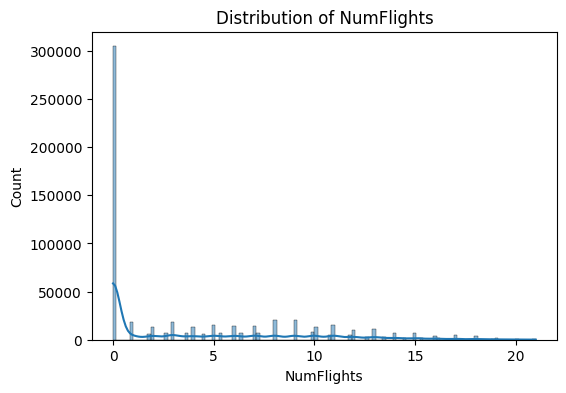

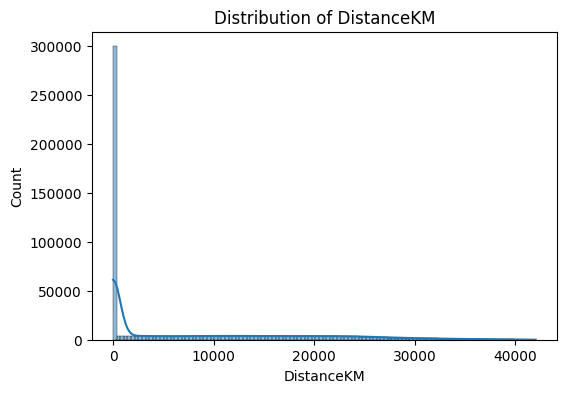

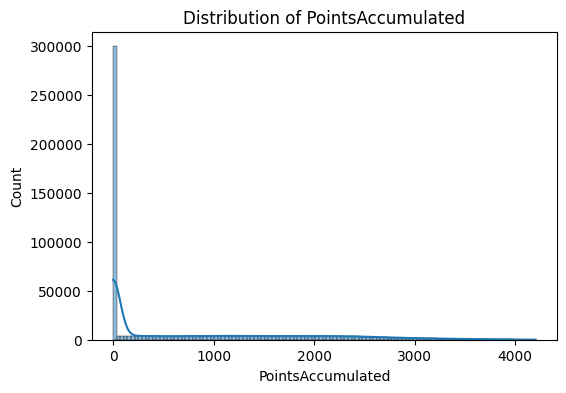

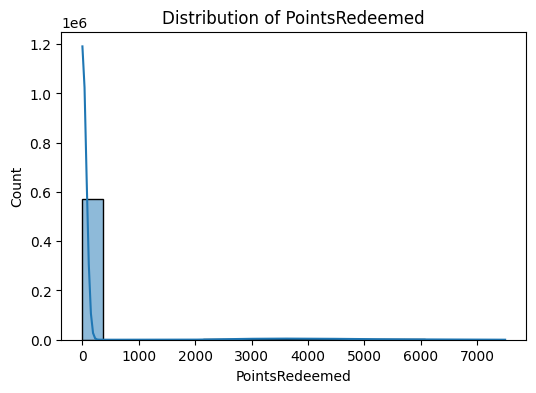

In [89]:

cols = ['NumFlights', 'DistanceKM', 'PointsAccumulated', 'PointsRedeemed']
for c in cols:
    plt.figure(figsize=(6,4))
    sns.histplot(flights_df[c], kde=True)
    plt.title(f'Distribution of {c}')
    plt.show()


### Distribution of Flight-Related Variables

The histograms above display the distribution of key numerical variables in the **raw FlightsDB dataset**.  
Each variable represents a different aspect of customer flight behavior within the loyalty program:

- **NumFlights**:  
  The distribution is extremely right-skewed, with the vast majority of records showing fewer than 2 flights per period.  
  This indicates that most loyalty customers fly infrequently, while a small group of high-activity members take many flights.

- **DistanceKM**:  
  Follows a similar long-tail pattern, where most trips cover short distances and only a few records represent long-haul flights.  
  The presence of some very large distance values may correspond to intercontinental travel or potential data entry inconsistencies.

- **PointsAccumulated**:  
  Mirrors the distribution of distance, which suggests that accumulated points are directly linked to the total distance traveled.  
  This reinforces the expectation that **PointsAccumulated ≈ f(DistanceKM)**, confirming a strong dependency between these variables.

- **PointsRedeemed**:  
  Also heavily right-skewed, with most values close to zero.  
  This shows that many customers have not yet redeemed their points, while a small proportion perform high-value redemptions, possibly linked to premium rewards or frequent travel patterns.

Overall, all four variables exhibit **highly skewed, long-tailed distributions**, typical of customer activity datasets where a few users account for the majority of transactions.  
These patterns suggest the need for potential data transformations (e.g., logarithmic scaling) or segmentation strategies to handle the strong imbalance between low- and high-activity customers in later modeling stages.


### Relationship Between Points Accumulated and Points Redeemed

In this step, we visualize the relationship between the number of loyalty points accumulated and the number of points redeemed by customers.  
The goal is to identify whether customers who earn more points also tend to redeem more, and to detect any potential behavioral patterns such as low redemption among high-earning customers.

This scatterplot helps assess engagement with the loyalty program, revealing possible customer types:
- **High accumulation but low redemption** → customers who hoard points (potentially less engaged).  
- **Balanced accumulation and redemption** → actively engaged customers.  
- **Low accumulation and redemption** → infrequent travelers or low-value customers.


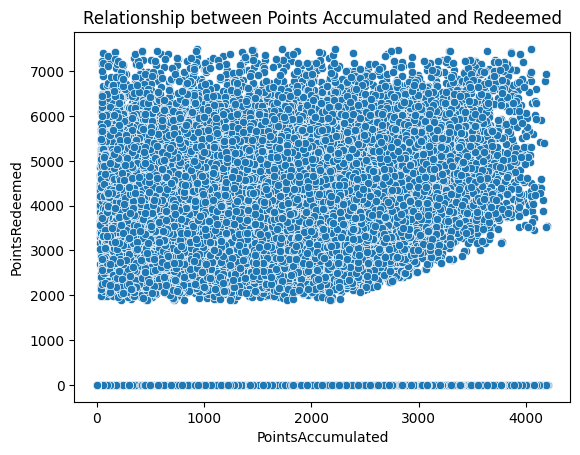

In [90]:
sns.scatterplot(data=flights_df, x='PointsAccumulated', y='PointsRedeemed')
plt.title('Relationship between Points Accumulated and Redeemed')
plt.show()


### Relationship between Points Accumulated and Redeemed (Output)

The scatterplot shows a generally **positive relationship** between the number of points accumulated and redeemed, meaning customers who earn more points also tend to redeem more.  
However, a large horizontal cluster near `PointsRedeemed = 0` reveals that many customers accumulate points without redeeming them, possibly indicating inactive or less engaged loyalty members.  
The wide dispersion suggests variability in redemption behavior — not all high-earning customers redeem their points at the same rate.


### Relationship Between Distance and Points Accumulated
This plot evaluates the proportionality between distance flown and points earned.  
A strong linear pattern would confirm that points accumulation is directly linked to flight distance, as expected in mileage-based loyalty programs.


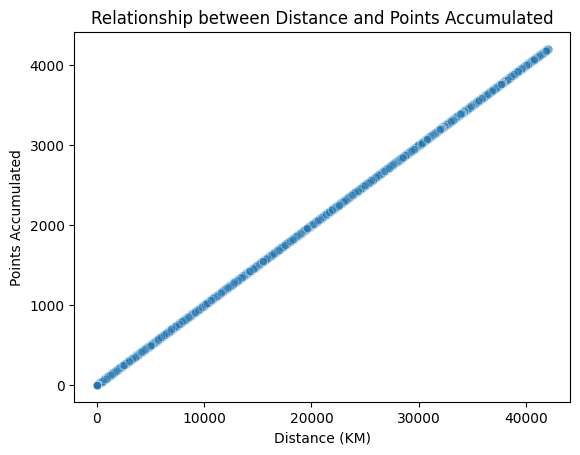

In [91]:
sns.scatterplot(data=flights_df, x='DistanceKM', y='PointsAccumulated', alpha=0.3)
plt.title('Relationship between Distance and Points Accumulated')
plt.xlabel('Distance (KM)')
plt.ylabel('Points Accumulated')
plt.show()


### Relationship between Distance and Points Accumulated (Output)

The scatterplot displays an almost **perfect linear relationship** between `DistanceKM` and `PointsAccumulated`.  
This confirms that the number of points earned is directly proportional to the flight distance, the further the customer travels, the more points are accumulated.  
Such a one-to-one relationship indicates that these two variables are **highly redundant**, and one of them can likely be excluded or transformed in future modeling steps to avoid multicollinearity.


### Relationship Between Flight Frequency and Points Accumulation
This visualization explores how the number of flights relates to points accumulation.  
We expect a positive correlation, as customers who travel more frequently generally earn more loyalty points.


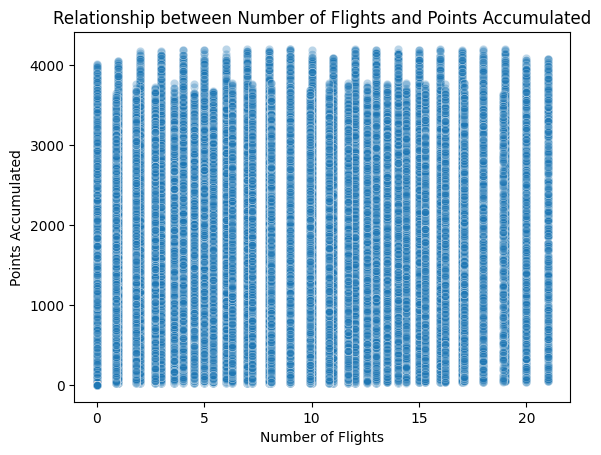

In [92]:
sns.scatterplot(data=flights_df, x='NumFlights', y='PointsAccumulated', alpha=0.3)
plt.title('Relationship between Number of Flights and Points Accumulated')
plt.xlabel('Number of Flights')
plt.ylabel('Points Accumulated')
plt.show()


### Relationship between Number of Flights and Points Accumulated

The scatterplot shows a **positive but highly dispersed relationship** between the number of flights and the points accumulated.  
While customers with more flights tend to earn more points overall, the pattern is not linear — several customers with the same flight count have widely different point totals.  
This variation suggests that the **distance traveled per flight** strongly affects point accumulation, confirming that both flight frequency and flight distance jointly drive loyalty point earnings.


### Relationship Between Distance and Points Redeemed
This plot examines whether redemption behavior depends on travel distance.  
It helps identify if long-distance travelers are more likely to redeem points or if redemption occurs independently of flight type.


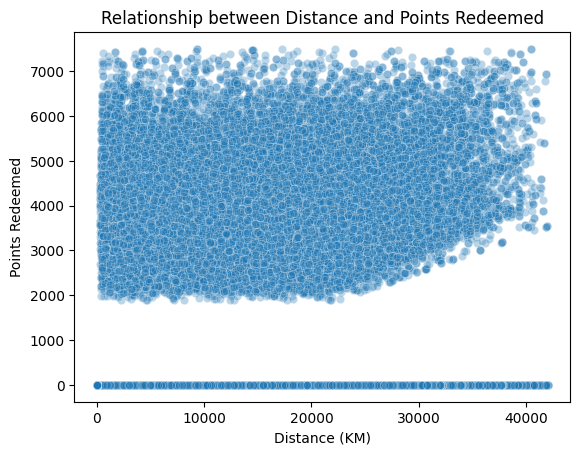

In [93]:
sns.scatterplot(data=flights_df, x='DistanceKM', y='PointsRedeemed', alpha=0.3)
plt.title('Relationship between Distance and Points Redeemed')
plt.xlabel('Distance (KM)')
plt.ylabel('Points Redeemed')
plt.show()


### Relationship between Distance and Points Redeemed

The scatterplot shows a **weak positive relationship** between `DistanceKM` and `PointsRedeemed`.  
While customers who travel longer distances tend to redeem slightly more points, the association is not strong — the points are widely scattered across the entire range.  
A dense concentration of observations near `PointsRedeemed = 0` indicates that many customers have **never redeemed their points**, reinforcing the pattern of limited redemption activity within the loyalty program.


### Correlation Matrix of Flight Variables
To summarize all pairwise relationships, we generate a correlation heatmap.  
This helps confirm the strength of relationships observed in the scatterplots — for instance, between distance and accumulated points or between flight frequency and redemption activity.


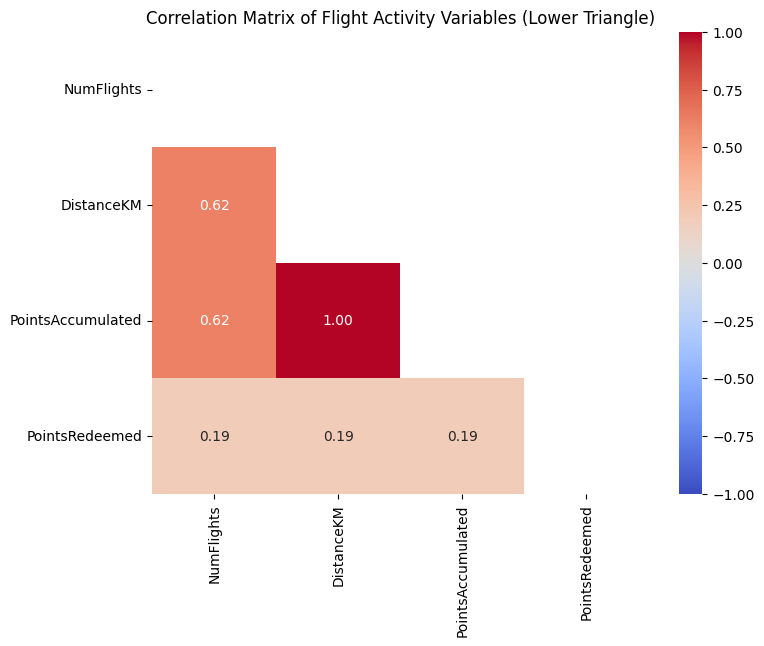

In [94]:
plt.figure(figsize=(8,6))

# calculate correlation matrix
corr = flights_df[['NumFlights','DistanceKM','PointsAccumulated','PointsRedeemed']].corr()

# mask to hide superior part of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# generate heatmap
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

plt.title('Correlation Matrix of Flight Activity Variables (Lower Triangle)')
plt.show()


## Outliers

### Detecting Outliers in Flight Variables

In this step, we use boxplots to visually identify potential outliers in the main numerical variables of the *Flights Database*.  
Boxplots provide a clear summary of the data distribution by displaying the median, quartiles, and extreme values.  
They help detect unusually high or low values that may represent either true exceptional behaviors (e.g., very frequent travelers or long-haul flights) or potential data quality issues.

By plotting all key variables — `NumFlights`, `DistanceKM`, `PointsAccumulated`, and `PointsRedeemed` — we can quickly assess the spread and variability of each metric and decide whether any data transformations or filtering steps are needed before modeling.


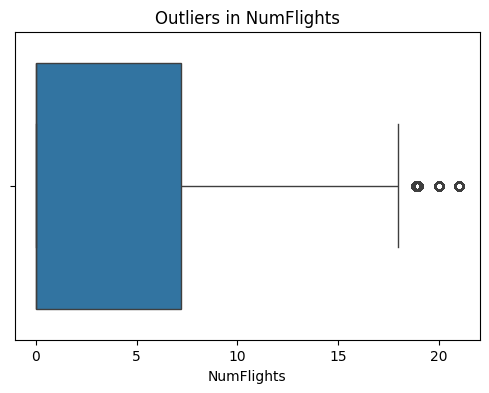

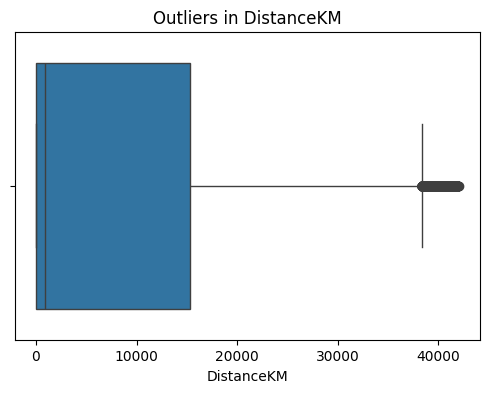

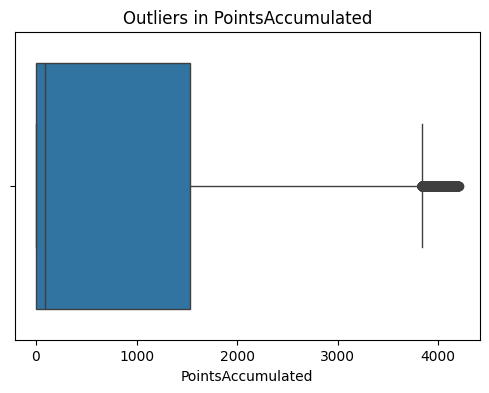

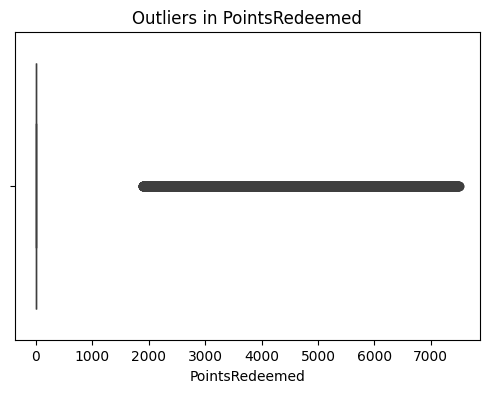

In [95]:
for c in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=flights_df[c])
    plt.title(f'Outliers in {c}')
    plt.show()


### Outliers in NumFlights

The boxplot for `NumFlights` reveals a **right-skewed distribution** with a small number of extreme values.  
While most records show customers taking fewer than 10 flights, a few highly active travelers exceed 20 flights per period, appearing as outliers.  
These cases likely represent frequent flyers rather than errors, highlighting customer segments with intense travel behavior.


### Outliers in DistanceKM

The boxplot of `DistanceKM` shows several **extreme long-distance values** beyond 30,000 km.  
Most flights are short to medium range, but a few intercontinental or multi-leg journeys account for the highest distances.  
These outliers are expected in airline data and reflect **legitimate but rare travel patterns**, not data anomalies.


### Outliers in PointsAccumulated

The distribution of `PointsAccumulated` closely mirrors that of `DistanceKM`, showing a **similar right-skewed pattern**.  
A handful of customers accumulate exceptionally high point totals, corresponding to those who traveled the longest distances.  
These observations confirm the direct proportionality between distance flown and points earned.


### Outliers in PointsRedeemed

The boxplot for `PointsRedeemed` displays a **wide range of values** with many observations far above the upper whisker.  
This indicates a small subset of customers performing large redemptions — possibly for high-value rewards — while most customers redeem little or none.  
The strong imbalance between low and high redemptions is typical in loyalty programs and should be addressed in future segmentation or normalization steps.


### Monthly Flight Activity Trends

In this step, we analyze how customer flight activity evolves over time.  
The data is grouped by `YearMonthDate` to aggregate the total number of flights and points accumulated each month.  
This temporal aggregation allows us to identify patterns or seasonality in flight frequency — for example, periods of higher travel activity or drops that may correspond to external factors such as holidays or travel restrictions.

The resulting line plot illustrates how the total number of flights changes month by month, providing insight into overall customer engagement trends within the loyalty program.


<Axes: title={'center': 'Flights per Month'}, xlabel='YearMonthDate'>

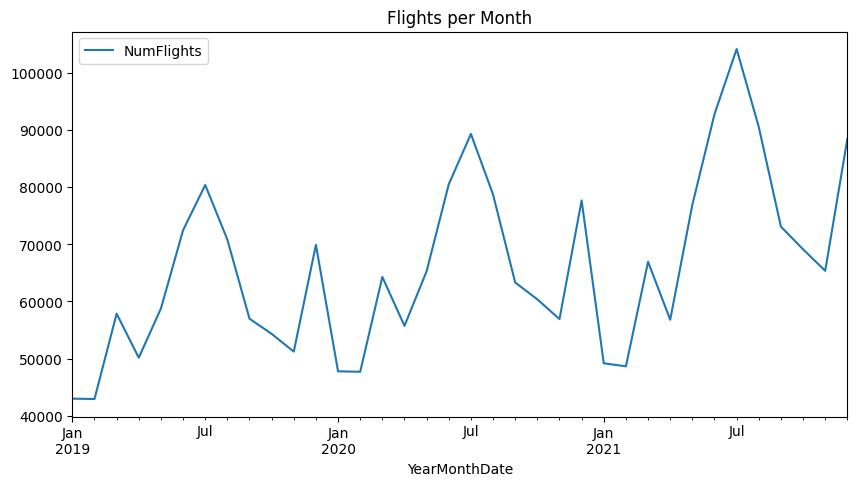

In [96]:
monthly_trends = flights_df.groupby('YearMonthDate')[['NumFlights', 'PointsAccumulated']].sum().reset_index()
monthly_trends.plot(x='YearMonthDate', y='NumFlights', figsize=(10,5), title='Flights per Month')


### Monthly Flight Trends (Output)

The line plot shows the total number of flights (`NumFlights`) aggregated by month across the observation period (2019–2021).  
The data exhibits clear **seasonal fluctuations**, with multiple peaks suggesting periods of higher travel demand — likely aligned with holiday seasons or promotional campaigns.  
Noticeable dips appear around early 2020, which could reflect **reduced travel activity**, possibly due to external events such as the COVID-19 pandemic.  
Overall, the trend indicates a gradual recovery and growth in flight activity toward 2021, consistent with the airline industry's broader post-crisis rebound.


### Total Flights per Customer

In this step, we aggregate the dataset by the `Loyalty#` identifier to calculate the **total number of flights per customer** across the entire observation period.  
This aggregation provides a customer-level view of flight activity instead of a monthly perspective, helping to identify how frequently each loyalty member travels overall.  

The histogram shows the distribution of total flights per customer, allowing us to distinguish between **occasional travelers** (few total flights) and **frequent flyers** (many total flights).  
The inclusion of a Kernel Density Estimation (KDE) curve helps visualize the overall shape of the distribution and detect whether most customers are concentrated in the low-activity range or spread more evenly.


Text(0.5, 1.0, 'Total Flights per Customer')

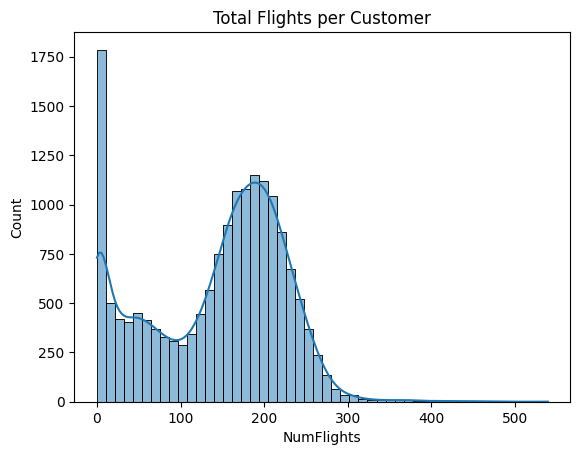

In [97]:
active = flights_df.groupby('Loyalty#')['NumFlights'].sum()
sns.histplot(active, bins=50, kde=True)
plt.title('Total Flights per Customer')


### Total Flights per Customer

The histogram illustrates the total number of flights taken by each customer over the observation period.  
The distribution is **right-skewed and multimodal**, indicating the presence of distinct customer groups:  
- A large segment of customers with very few flights, reflecting low engagement or occasional travelers.  
- A secondary concentration around 150–200 flights, representing frequent flyers or highly active loyalty members.  
- A long tail extending beyond 400 flights, capturing a small number of elite or corporate travelers.

This heterogeneous pattern highlights the potential for **customer segmentation**, as flight frequency varies greatly among loyalty members — a key insight for targeted marketing and retention strategies.


## Variable Selection

## Redundancy (Perspectives)

## Scaling

## Encoding (extra??)